In [8]:
%matplotlib inline
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams
#from mpl_toolkits import mplot3d
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
import urllib.request as Request
import urllib
import requests
import json
import ast
import re
#import the nltk package
import nltk
#call the nltk downloader
#nltk.download()
import string
#nltk.download_shell()
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from textblob import TextBlob
import stanza

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# metrics are used to find accuracy or error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import time
from numpy import mean
from numpy import std
# Word cloud visualization.
from wordcloud import WordCloud
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import nlpaug
import nlpaug.augmenter.word as naw
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

pd.set_option('max_colwidth', 510)


#### Scrape Data from Apify App using personal token. I have taken out the token for privacy.Commenting it as it takes many hours to scrape the data.

In [9]:
'''

# Initialize the ApifyClient with your API token
client = ApifyClient("*************personal token******************")

# Prepare the actor input
run_input = {
    "locationQuery": "California",
    "maxListings": 1500,
    "startUrls": [],
    "maxReviews": 50,
    "calendarMonths": 0,
    "currency": "USD",
    "proxyConfiguration": { "useApifyProxy": True },
    "maxConcurrency": 50,
    "limitPoints": 100,
    "timeoutMs": 60000,
}

# Run the actor and wait for it to finish
run = client.actor("dtrungtin/airbnb-scraper").call(run_input=run_input)

# Fetch and print actor results from the run's dataset (if there are any)
with open("scrapejsonfile.json", "w") as outfile:
    for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    #print(item)
        json.dump(item, outfile)
        
'''

'\n\n# Initialize the ApifyClient with your API token\nclient = ApifyClient("*************personal token******************")\n\n# Prepare the actor input\nrun_input = {\n    "locationQuery": "California",\n    "maxListings": 1500,\n    "startUrls": [],\n    "maxReviews": 50,\n    "calendarMonths": 0,\n    "currency": "USD",\n    "proxyConfiguration": { "useApifyProxy": True },\n    "maxConcurrency": 50,\n    "limitPoints": 100,\n    "timeoutMs": 60000,\n}\n\n# Run the actor and wait for it to finish\nrun = client.actor("dtrungtin/airbnb-scraper").call(run_input=run_input)\n\n# Fetch and print actor results from the run\'s dataset (if there are any)\nwith open("scrapejsonfile.json", "w") as outfile:\n    for item in client.dataset(run["defaultDatasetId"]).iterate_items():\n    #print(item)\n        json.dump(item, outfile)\n        \n'

In [359]:
# reading the JSON data using json.load()
file = 'C:/vIDUSHI/SJSU/Data245 - ML/Project/ScrapedData/dataset_airbnb-scraper_2022-10-21_03-38-04-881.json'
df_json = pd.read_json(file)

pd.set_option('display.max_columns', len(df_json.columns)) 

df_json.head()


,name,roomType,stars,address,numberOfGuests,pricing,reviews,url
0,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",4,{},"[{'author': {'firstName': 'Alison', 'hasProfilePic': True, 'id': '462120757', 'pictureUrl': 'https://a0.muscache.com/im/pictures/user/cb3b75f3-60c8-4a31-90ac-20f3e5c6df0f.jpg?aki_policy=profile_x_medium', 'smartName': 'Alison', 'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/cb3b75f3-60c8-4a31-90ac-20f3e5c6df0f.jpg?aki_policy=profile_small'}, 'comments': 'Our stay at the Redwood Riverwalk Hotel was awesome! Even before arriving, the staff made us feel welcome: they were incredibly pet friend...",https://www.airbnb.com/rooms/34340602
1,Dragonfly House /Veg/Vegan opt.yuhu \nYThank,Private room in rental unit,5.00,"Fortuna, California, United States",3,{},"[{'author': {'firstName': 'Joshua', 'hasProfilePic': True, 'id': '187743107', 'pictureUrl': 'https://a0.muscache.com/im/pictures/user/d7ecf10c-1080-4d6c-acf4-bf224ed1682c.jpg?aki_policy=profile_x_medium', 'smartName': 'Joshua', 'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/d7ecf10c-1080-4d6c-acf4-bf224ed1682c.jpg?aki_policy=profile_small'}, 'comments': 'Enjoyed our stay', 'createdAt': '2019-08-17T23:53:27Z', 'id': '511764918', 'collectionTag': None, 'rating': 5, 'recipient': {'firstName': ...",https://www.airbnb.com/rooms/19576699
2,Dragonfly House check my other listing,Private room in home,5.00,"Fortuna, California, United States",2,{},"[{'author': {'firstName': 'Adrien', 'hasProfilePic': True, 'id': '173835220', 'pictureUrl': 'https://a0.muscache.com/im/pictures/user/a4dc8b7f-a2bd-4665-b9e2-62a4022333f2.jpg?aki_policy=profile_x_medium', 'smartName': 'Adrien', 'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/a4dc8b7f-a2bd-4665-b9e2-62a4022333f2.jpg?aki_policy=profile_small'}, 'comments': 'Stayed up stairs, plenty of room, nice balcony with beautiful view/stars, awesome amenities , thank you ', 'createdAt': '2019-09-01T22:09:...",https://www.airbnb.com/rooms/18194850
3,Ira Russ Room-201 - Victorian Inn,Room in boutique hotel,5.00,"Ferndale, California, United States",4,{},"[{'author': {'firstName': 'Nevada', 'hasProfilePic': True, 'id': '268689008', 'pictureUrl': 'https://a0.muscache.com/im/pictures/user/87889fda-b217-4cad-9e05-54a4a3740fbf.jpg?aki_policy=profile_x_medium', 'smartName': 'Nevada', 'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/87889fda-b217-4cad-9e05-54a4a3740fbf.jpg?aki_policy=profile_small'}, 'comments': 'Worth the money, don't let price change your mind. Just do it.', 'createdAt': '2020-07-04T22:50:41Z', 'id': '634613848', 'collectionTag':...",https://www.airbnb.com/rooms/20958777
4,Petrolia Guest House,Entire guest suite,4.50,"Petrolia, California, United States",4,{},"[{'author': {'firstName': 'Brian', 'hasProfilePic': True, 'id': '95361362', 'pictureUrl': 'https://a0.muscache.com/im/pictures/user/2b6f6cd1-989e-4f01-9dc9-2403248181b3.jpg?aki_policy=profile_x_medium', 'smartName': 'Brian', 'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/2b6f6cd1-989e-4f01-9dc9-2403248181b3.jpg?aki_policy=profile_small'}, 'comments': 'The host canceled this reservation 32 days before arrival. This is an automated posting.', 'createdAt': '2019-07-11T18:01:58Z', 'id': '485807...",https://www.airbnb.com/rooms/968863


#### Exploring some continuous features


In [360]:
def annotate_perc(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

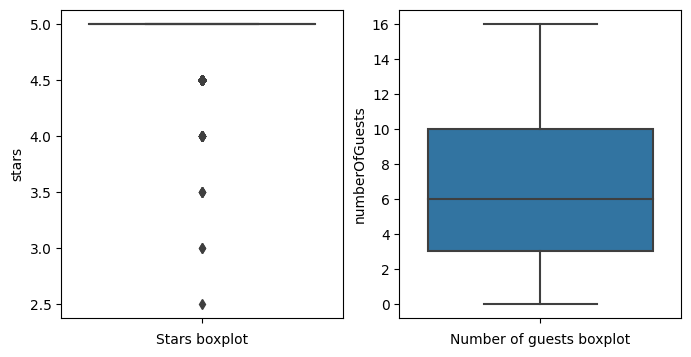

In [361]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))
sn.boxplot( y=df_json["stars"],ax=ax[0]);
sn.boxplot( y=df_json["numberOfGuests"],ax=ax[1]);
ax[0].set_xlabel("Stars boxplot")
ax[1].set_xlabel("Number of guests boxplot")

plt.show()



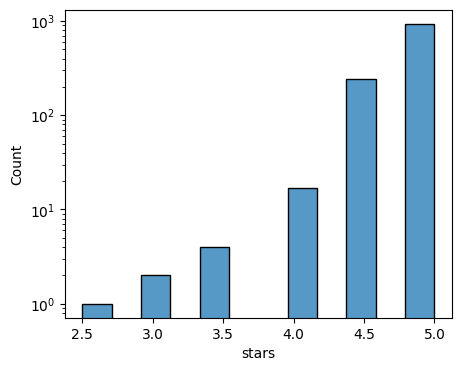

In [375]:
fig,ax = plt.subplots(figsize=(5,4))
ax = sn.histplot( x=df_json['stars'],log=True);
#annotate_perc(ax,df_json.stars)


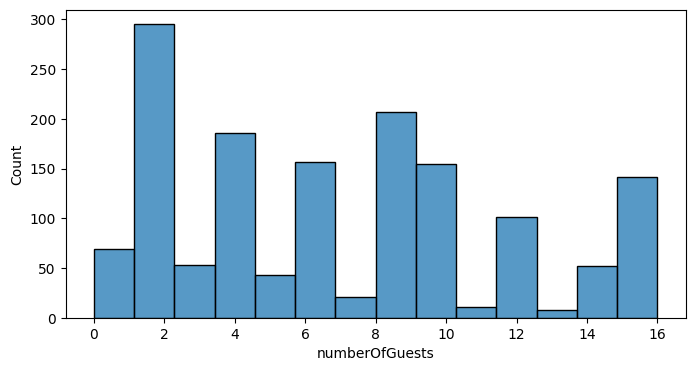

In [374]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sn.histplot( x=df_json["numberOfGuests"]);
#annotate_perc(ax,df_json.numberOfGuests)

#### The most number of guests accoumpanying were 2 and range lie between 2 to 10 (1st quartile to 3rd Quartile.)
#### However, We do not need numberOfguests for our analysis so we will drop that column.


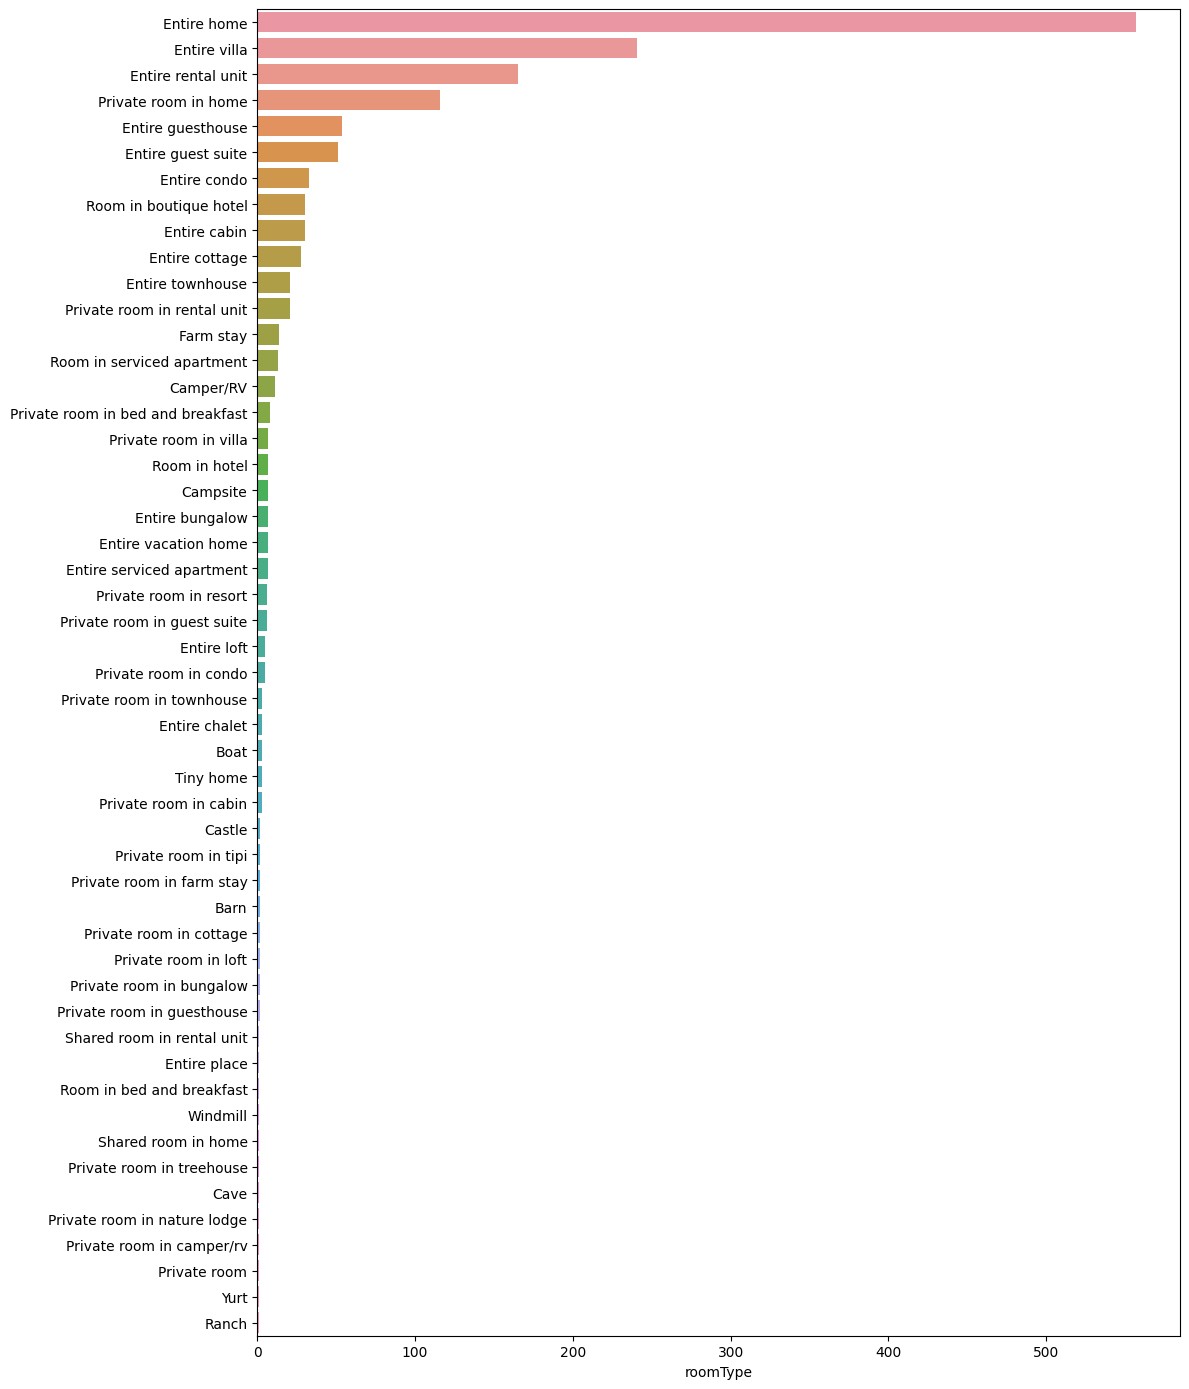

In [15]:
fig,ax = plt.subplots(figsize=(12,14))
sn.barplot(x=df_json["roomType"].value_counts(),y=df_json["roomType"].value_counts().index,ax=ax)
plt.tight_layout()
plt.show()

#### Entire houses,villas,units, guestshouse,guests suites, cabin, cottage and townhouses are more prevalent than single rooms 

In [16]:
df_json.shape


(1500, 8)

#### Data is for 1500 hotels

#### Reviews column is a JSON format dictionary that has multiple key value pairs. We will extract useful columns such as comments,rating,response,localized review and make a dataframe along with some hotel features.

In [17]:
df_final = pd.DataFrame(columns=['hotelIndex','comments','rating','response','localizedReview','hotelName','roomType','stars','address'])
for i in range(len(df_json)):
    df_review = df_json.reviews[i]
    
    df_rev = pd.DataFrame.from_dict(df_review)
    #print(df_rev.head())
    pd.set_option('display.max_columns', len(df_rev.columns)) 
    df_rev.drop(list(df_rev.filter(regex = 'createdAt')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'id')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'collectionTag')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'author')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'recipient')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'localizedDate')), axis = 1, inplace = True)
    df_rev.drop(list(df_rev.filter(regex = 'language')), axis = 1, inplace = True)
    df_rev['hotelIndex'] = i
    df_rev['hotelName'] = df_json.name[i]
    df_rev['roomType'] = df_json.roomType[i]
    df_rev['stars'] = df_json.stars[i]
    df_rev['address'] = df_json.address[i]
    df_final = df_final.append(df_rev)

df_final.tail()


,hotelIndex,comments,rating,response,localizedReview,hotelName,roomType,stars,address
29,1499,Beyond wonderful! Highly recommend this place!,5,Thanks so much Lisa!,None,Romantic Spanish Style Mansion in Pasadena.,Entire home,5.00,"Pasadena, California, United States"
30,1499,"Jeffery is a communicative and accommodating host for this historical home. Every room had its own unique characteristics and had everything we needed and more. Surrounded by trees with breath-taking views of mountains, the location served as a perfect setting for an intimate team off-site, where we were able to connect, strategize, get work done and enjoy a night out in Old Town Pasadena!",5,None,None,Romantic Spanish Style Mansion in Pasadena.,Entire home,5.00,"Pasadena, California, United States"
31,1499,Jeff was great with responses and details! Place is great for family!!,5,None,None,Romantic Spanish Style Mansion in Pasadena.,Entire home,5.00,"Pasadena, California, United States"
32,1499,"the house is so beautiful and exactly like the pictures, located in the most peaceful neighborhood and Jeffery was great with communication and any questions we had. This is an amazing and historic home.",5,None,None,Romantic Spanish Style Mansion in Pasadena.,Entire home,5.00,"Pasadena, California, United States"
33,1499,"This historic Paul Williams house was visually stunning, had excellent personal touches, and made us feel like we were vacationing in a completely different area even though we live locally. All of our questions were thoroughly answered, the home was warm and inviting, and there were a wide variety of entertainment options throughout the house. Great views, extremely well-stocked kitchen, and each room was unique and interesting.",5,Aw we loved having you all! The perfect guests who adore our house as much as we do! :)\r<br/>\r<br/>The follow up questions on design and all the details made our day. This was a 2 year remodel and we loved every minute of it. \r<br/>\r<br/>Paul Williams is the most amazing architect and we are grateful he is so beloved! \r<br/>\r<br/>please come again :)\r<br/>\r<br/>Jeffery,None,Romantic Spanish Style Mansion in Pasadena.,Entire home,5.00,"Pasadena, California, United States"


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38085 entries, 0 to 33
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotelIndex       38085 non-null  object 
 1   comments         38085 non-null  object 
 2   rating           38085 non-null  object 
 3   response         3306 non-null   object 
 4   localizedReview  190 non-null    object 
 5   hotelName        38085 non-null  object 
 6   roomType         38085 non-null  object 
 7   stars            37931 non-null  float64
 8   address          38085 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.9+ MB


#### Now we have at max 50 reviews per hotel and each row represent a review. There are 38085 reviews out of which three columns have missing data - response,localizedReview ,and stars.  

#### Checking what localizedReview contains

In [19]:
df_localized = df_final.loc[df_final['localizedReview'].notnull(), ['hotelIndex','hotelName','comments','localizedReview']]
df_localized

,hotelIndex,hotelName,comments,localizedReview
4,15,8 - Bear River Suite - Redwood Suites,Es un lindo lugar y bien equipado,"{'comments': 'It's a nice place and well equipped', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
27,39,"Cozy 3 bedroom home, close to everything","Questo appartamento si trova a Fortuna, non lontano dalla Avenue of the Giants, da Eureka e ottima base per girare tutta l'area di Humbolt. Il rapporto qualità prezzo è ottimo e per chi ha necessità di spazio e voglia di un ottimo barbecue è il posto ideale.","{'comments': 'This apartment is located in Fortuna, not far from the Avenue of the Giants, from Eureka and a great base for touring the entire Humbolt area. The value for money is great, and for those who need space and want a great barbecue, it's the ideal place.', 'disclaimer': 'Translated from Italian', 'needsTranslation': True, 'response': None}"
38,44,Creekside Cabin,Estar perfecta muy cómoda muy espaciosa y sobre todo esta ubicada en un lugar muy tranquilo 👌,"{'comments': 'To be perfect, very comfortable, very spacious and above all, it is located in a very quiet place 👌', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
42,56,Bright & airy apartment. Central Fortuna location.,Todo muy bien,"{'comments': 'Everything is very good', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
44,77,Cozy room in nice Albany house,"Mein Zimmer war groß. Das Bett war bequem. Ich konnte gut schlafen. In der Küche fand ich alles vor, was ich brauchte. Auf Nachfrage erhielt ich frische Handtücher. Die Wände waren hellhörig. Im Haus war es kalt. Im Garten konnte ich in der Sonne sitzen. Andere Mitbewohner*innen waren berufstätig. Deshalb war ein Badezimmer zum Teilen morgens etwas knapp. Anat lernte ich leider nur am Telefon kennen, da ich viel unterwegs war. Sie war sehr freundlich.","{'comments': 'My room was big. The bed was comfortable. I was able to sleep well. In the kitchen I found everything I needed. On request I received fresh towels. The walls were hard of sound. It was cold in the house. In the garden I could sit in the sun. Other roommates were working. That's why a bathroom for sharing was a bit scarce in the morning. Unfortunately, I only met Anat on the phone because I was on the road a lot. She was very friendly.', 'disclaimer': 'Translated from German', 'needsTrans..."
...,...,...,...,...
35,1448,Psychic Arches,no,"{'comments': 'no', 'disclaimer': 'Translated from Italian', 'needsTranslation': True, 'response': None}"
36,1455,The Playboy Pad: Mid-Century Luxury Oasis,⭐️⭐️⭐️⭐️⭐️,"{'comments': '⭐️⭐️⭐️⭐️⭐️', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
23,1468,"Beachfront Malibu House w/ 3 Decks, Jacuzzi, Sauna",.,"{'comments': '.', 'disclaimer': 'Translated from French', 'needsTranslation': True, 'response': None}"
36,1479,The Acacia Farmhouse Sonoma,Meilleure maison !!!,"{'comments': 'Best home!!!', 'disclaimer': 'Translated from French', 'needsTranslation': True, 'response': None}"


In [20]:
df_final.head()

,hotelIndex,comments,rating,response,localizedReview,hotelName,roomType,stars,address
0,0,"Our stay at the Redwood Riverwalk Hotel was awesome! Even before arriving, the staff made us feel welcome: they were incredibly pet friendly, they provided recommendations for the area, they were efficient and warm in their communications, and they offered to help in any way they could. We arrived a lot later than expected, and even though it was in the middle of the night, the person at the front desk gave us a full intro (explained features and amenities, such as the off-leash yard, the dining areas...",5,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
1,0,Fun and funky! Would return again.,5,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
2,0,Booked a room with a jacuzzi but was given a room without this. I raised it the next morning and the lady was apologetic and gave us a small refund.,3,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
3,0,It was a decent stay. A bit run down but concierge location,4,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
4,0,"Pictures and descriptions are not accurate. We were placed in a room that did not at all fit the descriptions or photos provided. Went to front desk and they said the room I booked was already given to someone else. Offered a different room that was closer to what was booked. Contacted the owner and the owner essentially said that youre booking any room in the motel they want to give you. Would absolutely not recommend booking this place! This is very motel quality, and youre not even guaranteed the r...",2,"We are a motel, let there be no confusion, And you still chose to stay with us because you got a room exactly as you booked. It was not ""closer""; it was precisely the same without the bunk beds and included the hot tub you wanted. That is what I stated to you. As we explained to you and Airbnb Support (that you barraged with complaints to get your 20% discount), we are a motel, not a one-off location. When our front desk team explained that you would have the same room listed without the bunkbeds, you...",None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"


#### LocalizedReview contains dictionary consisting of one key-value pair as reviews(comments) translated to english from different languages that are mentioned in the comments.

#### We need to get the commentIndex in a separate column as it resets for every hotel.

In [21]:
df_final.reset_index(inplace=True)
df_final = df_final.rename(columns = {'index':'commentIndex'})
df_final.head()


,commentIndex,hotelIndex,comments,rating,response,localizedReview,hotelName,roomType,stars,address
0,0,0,"Our stay at the Redwood Riverwalk Hotel was awesome! Even before arriving, the staff made us feel welcome: they were incredibly pet friendly, they provided recommendations for the area, they were efficient and warm in their communications, and they offered to help in any way they could. We arrived a lot later than expected, and even though it was in the middle of the night, the person at the front desk gave us a full intro (explained features and amenities, such as the off-leash yard, the dining areas...",5,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
1,1,0,Fun and funky! Would return again.,5,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
2,2,0,Booked a room with a jacuzzi but was given a room without this. I raised it the next morning and the lady was apologetic and gave us a small refund.,3,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
3,3,0,It was a decent stay. A bit run down but concierge location,4,None,None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"
4,4,0,"Pictures and descriptions are not accurate. We were placed in a room that did not at all fit the descriptions or photos provided. Went to front desk and they said the room I booked was already given to someone else. Offered a different room that was closer to what was booked. Contacted the owner and the owner essentially said that youre booking any room in the motel they want to give you. Would absolutely not recommend booking this place! This is very motel quality, and youre not even guaranteed the r...",2,"We are a motel, let there be no confusion, And you still chose to stay with us because you got a room exactly as you booked. It was not ""closer""; it was precisely the same without the bunk beds and included the hot tub you wanted. That is what I stated to you. As we explained to you and Airbnb Support (that you barraged with complaints to get your 20% discount), we are a motel, not a one-off location. When our front desk team explained that you would have the same room listed without the bunkbeds, you...",None,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States"


#### Saving file as CSV and JSON that can later be used for analysis. 

In [22]:
df_final.to_csv("C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/airbnb.csv")
df_final.to_json("C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/airbnb.json")


In [386]:
# Opening Json file and creating DataFrame using it.
df_a = pd.read_json('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/airbnb.json')
df_a.shape


(38085, 10)

In [377]:
df_a.isnull().sum()

commentIndex           0
hotelIndex             0
comments               0
rating                 0
response           34779
localizedReview    37895
hotelName              0
roomType               0
stars                154
address                0
dtype: int64

#### First, let's see what is there in response column with so much missing data.

In [25]:
df_res = df_a.loc[df_a['response'].notnull(),['comments','response']][:4]
df_res

,comments,response
4,"Pictures and descriptions are not accurate. We were placed in a room that did not at all fit the descriptions or photos provided. Went to front desk and they said the room I booked was already given to someone else. Offered a different room that was closer to what was booked. Contacted the owner and the owner essentially said that youre booking any room in the motel they want to give you. Would absolutely not recommend booking this place! This is very motel quality, and youre not even guaranteed the r...","We are a motel, let there be no confusion, And you still chose to stay with us because you got a room exactly as you booked. It was not ""closer""; it was precisely the same without the bunk beds and included the hot tub you wanted. That is what I stated to you. As we explained to you and Airbnb Support (that you barraged with complaints to get your 20% discount), we are a motel, not a one-off location. When our front desk team explained that you would have the same room listed without the bunkbeds, you..."
11,"Their are amazing touches that make this place an unexpected delight. Plenty of books and games in the lobby to borrow, the dog friendly aspects are legit, and the outside seating is very restful! The art on the building was amazing! <br/>Finally, the staff who checked us in was genuinely friendly, and very helpful. We loved this place!","We love all our art projects, too. Thank you."
44,"I checked in fairly late (8:45 pm) and the staff, Leanne, was just super! She made everything easy peasy. The next morning, Gina made breakfast and checkout just as easy. <br/>The Lumberjack room is super neat, a set of bunk beds and a king. Huge jacuzzi tub in room. Neat furniture. <br/>All around an exemplary experience.","We love our team. Glad you do, too!"
45,"Great space, nice and roomy. We loved the Jacuzzi!",Plenty of room for two! Thanks.


#### The response column is the response by the hotel on the comments provided by the customer. We would not need that for customer sentiment analysis. We will remove this column

In [26]:
df_a = df_a.drop(columns=['response'])
df_a.shape

(38085, 9)

#### Now, localizedReview feature is a json format dictionary column containing english translation of the comment given in  different language in the comments column. Here, we replace the regional language to english.

In [27]:
df_t = df_a.loc[df_a['localizedReview'].notnull(), ['comments','localizedReview']]
df_t.head()

,comments,localizedReview
265,Es un lindo lugar y bien equipado,"{'comments': 'It's a nice place and well equipped', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
901,"Questo appartamento si trova a Fortuna, non lontano dalla Avenue of the Giants, da Eureka e ottima base per girare tutta l'area di Humbolt. Il rapporto qualità prezzo è ottimo e per chi ha necessità di spazio e voglia di un ottimo barbecue è il posto ideale.","{'comments': 'This apartment is located in Fortuna, not far from the Avenue of the Giants, from Eureka and a great base for touring the entire Humbolt area. The value for money is great, and for those who need space and want a great barbecue, it's the ideal place.', 'disclaimer': 'Translated from Italian', 'needsTranslation': True, 'response': None}"
1054,Estar perfecta muy cómoda muy espaciosa y sobre todo esta ubicada en un lugar muy tranquilo 👌,"{'comments': 'To be perfect, very comfortable, very spacious and above all, it is located in a very quiet place 👌', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
1562,Todo muy bien,"{'comments': 'Everything is very good', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
2501,"Mein Zimmer war groß. Das Bett war bequem. Ich konnte gut schlafen. In der Küche fand ich alles vor, was ich brauchte. Auf Nachfrage erhielt ich frische Handtücher. Die Wände waren hellhörig. Im Haus war es kalt. Im Garten konnte ich in der Sonne sitzen. Andere Mitbewohner*innen waren berufstätig. Deshalb war ein Badezimmer zum Teilen morgens etwas knapp. Anat lernte ich leider nur am Telefon kennen, da ich viel unterwegs war. Sie war sehr freundlich.","{'comments': 'My room was big. The bed was comfortable. I was able to sleep well. In the kitchen I found everything I needed. On request I received fresh towels. The walls were hard of sound. It was cold in the house. In the garden I could sit in the sun. Other roommates were working. That's why a bathroom for sharing was a bit scarce in the morning. Unfortunately, I only met Anat on the phone because I was on the road a lot. She was very friendly.', 'disclaimer': 'Translated from German', 'needsTrans..."


In [28]:
for row in df_a.itertuples():
    if (df_a.loc[row.Index , 'localizedReview']) is not None:
        comment = str(df_a.loc[row.Index, "localizedReview"]["comments"])
        df_a.loc[row.Index,"comments"] = comment if comment != "nan" else "none"


#### The below output shows that different language comments have been replaced by comments from localized Review column.

In [29]:
df_t = df_a.loc[df_a['localizedReview'].notnull(), ['comments','localizedReview']]
df_t.head()


,comments,localizedReview
265,It's a nice place and well equipped,"{'comments': 'It's a nice place and well equipped', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
901,"This apartment is located in Fortuna, not far from the Avenue of the Giants, from Eureka and a great base for touring the entire Humbolt area. The value for money is great, and for those who need space and want a great barbecue, it's the ideal place.","{'comments': 'This apartment is located in Fortuna, not far from the Avenue of the Giants, from Eureka and a great base for touring the entire Humbolt area. The value for money is great, and for those who need space and want a great barbecue, it's the ideal place.', 'disclaimer': 'Translated from Italian', 'needsTranslation': True, 'response': None}"
1054,"To be perfect, very comfortable, very spacious and above all, it is located in a very quiet place 👌","{'comments': 'To be perfect, very comfortable, very spacious and above all, it is located in a very quiet place 👌', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
1562,Everything is very good,"{'comments': 'Everything is very good', 'disclaimer': 'Translated from Spanish', 'needsTranslation': True, 'response': None}"
2501,"My room was big. The bed was comfortable. I was able to sleep well. In the kitchen I found everything I needed. On request I received fresh towels. The walls were hard of sound. It was cold in the house. In the garden I could sit in the sun. Other roommates were working. That's why a bathroom for sharing was a bit scarce in the morning. Unfortunately, I only met Anat on the phone because I was on the road a lot. She was very friendly.","{'comments': 'My room was big. The bed was comfortable. I was able to sleep well. In the kitchen I found everything I needed. On request I received fresh towels. The walls were hard of sound. It was cold in the house. In the garden I could sit in the sun. Other roommates were working. That's why a bathroom for sharing was a bit scarce in the morning. Unfortunately, I only met Anat on the phone because I was on the road a lot. She was very friendly.', 'disclaimer': 'Translated from German', 'needsTrans..."


#### We no longer need localizedReview column so we will drop it

In [30]:
df_a = df_a.drop(columns=['localizedReview'])
df_a.shape

(38085, 8)

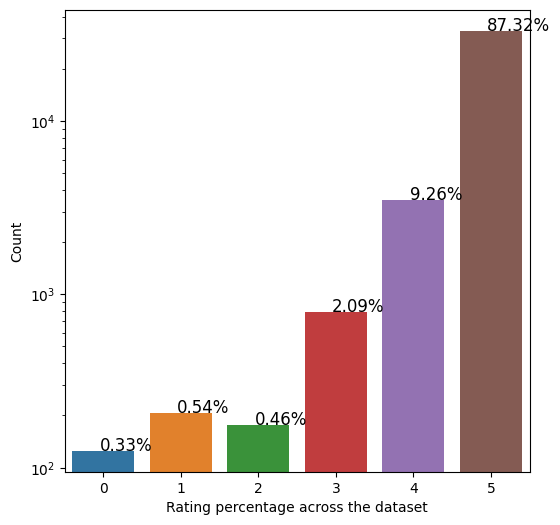

In [31]:
plt.figure(figsize=(6,6))
ax= sn.countplot(x='rating',log=True,data = df_a)
ax.set_ylabel("Count")
ax.set_xlabel("Rating percentage across the dataset")
annotate_perc(ax,df_a.rating)


#### As we can see the dataset is highly biased.There is a possibility that sites such as airbnb may not allow large number of negative comments.
#### We may need to do undersampling or oversampling to balance this dataset later for applying machine learning models.

In [32]:
df_a['senti_rating'] = np.where(((df_a['rating'] == 5)|(df_a['rating'] == 4)),"Positive","Negative")
df_a.head(4)


,commentIndex,hotelIndex,comments,rating,hotelName,roomType,stars,address,senti_rating
0,0,0,"Our stay at the Redwood Riverwalk Hotel was awesome! Even before arriving, the staff made us feel welcome: they were incredibly pet friendly, they provided recommendations for the area, they were efficient and warm in their communications, and they offered to help in any way they could. We arrived a lot later than expected, and even though it was in the middle of the night, the person at the front desk gave us a full intro (explained features and amenities, such as the off-leash yard, the dining areas...",5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive
1,1,0,Fun and funky! Would return again.,5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive
2,2,0,Booked a room with a jacuzzi but was given a room without this. I raised it the next morning and the lady was apologetic and gave us a small refund.,3,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Negative
3,3,0,It was a decent stay. A bit run down but concierge location,4,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive


In [33]:
df_a['senti_rating'].value_counts()

Positive    36782
Negative     1303
Name: senti_rating, dtype: int64

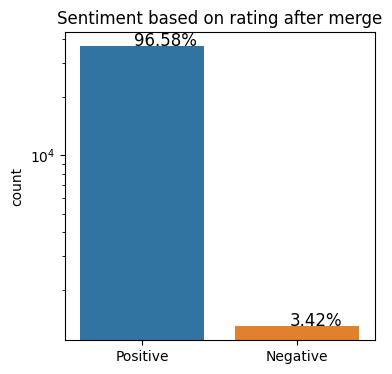

In [34]:
plt.figure(figsize=(4,4))
lab =['Positive','Negative']
ax= sn.barplot(x=lab,y=df_a['senti_rating'].value_counts(),log=True,data = df_a)
ax.set_ylabel("count")
ax.set_title("Sentiment based on rating after merge");
annotate_perc(ax,df_a.senti_rating)

### The dataset is highly baised after putting it into two classes. Therefore, we need to do sampling technique. Doing undersampling by deleting rows will result in the loss of data. Therefore, later we will do oversampling by use of data augmentation.


#### Now for analyzing the comments, we need to do basic cleaning steps. 
#### Removing HTML tags,punctuations,special characters etc

In [341]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    #print(text)
    return TAG_RE.sub('', text)

def process_text(sen):
    #print(sen)
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    #sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [36]:
for row in df_a.itertuples():
    comment = process_text(str(df_a.loc[row.Index,'comments']))
    df_a.loc[row.Index,'comments'] = comment


In [37]:
df_a.head()


,commentIndex,hotelIndex,comments,rating,hotelName,roomType,stars,address,senti_rating
0,0,0,Our stay at the Redwood Riverwalk Hotel was awesome Even before arriving the staff made us feel welcome they were incredibly pet friendly they provided recommendations for the area they were efficient and warm in their communications and they offered to help in any way they could We arrived a lot later than expected and even though it was in the middle of the night the person at the front desk gave us a full intro explained features and amenities such as the off leash yard the dining areas laundry and...,5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive
1,1,0,Fun and funky Would return again,5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive
2,2,0,Booked a room with a jacuzzi but was given a room without this I raised it the next morning and the lady was apologetic and gave us a small refund,3,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Negative
3,3,0,It was a decent stay A bit run down but concierge location,4,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive
4,4,0,Pictures and descriptions are not accurate We were placed in a room that did not at all fit the descriptions or photos provided Went to front desk and they said the room I booked was already given to someone else Offered a different room that was closer to what was booked Contacted the owner and the owner essentially said that youre booking any room in the motel they want to give you Would absolutely not recommend booking this place This is very motel quality and youre not even guaranteed the room wit...,2,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Negative


#### Get parts of speech for words for lemmitization

In [38]:

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


#### Cleaning

In [39]:

def clean_comment(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
start = time.time()
df_a["comments_clean"] = df_a["comments"].apply(lambda x: clean_comment(x))
stop = time.time()
print(f'Cleaning took: {round((stop-start)/60, 3)} minutes')


Cleaning took: 1.007 minutes


In [40]:
df_a.head()

,commentIndex,hotelIndex,comments,rating,hotelName,roomType,stars,address,senti_rating,comments_clean
0,0,0,Our stay at the Redwood Riverwalk Hotel was awesome Even before arriving the staff made us feel welcome they were incredibly pet friendly they provided recommendations for the area they were efficient and warm in their communications and they offered to help in any way they could We arrived a lot later than expected and even though it was in the middle of the night the person at the front desk gave us a full intro explained features and amenities such as the off leash yard the dining areas laundry and...,5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive,stay redwood riverwalk hotel awesome even arrive staff make feel welcome incredibly pet friendly provide recommendation area efficient warm communication offer help way could arrive lot later expect even though middle night person front desk give full intro explain feature amenity leash yard din area laundry breakfast genuinely express warm wish stay room clean pleasantly furnish equipped liquid soap haircare lotion blow dryer iron full size iron board microwave fridge place everything king size bed c...
1,1,0,Fun and funky Would return again,5,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive,fun funky would return
2,2,0,Booked a room with a jacuzzi but was given a room without this I raised it the next morning and the lady was apologetic and gave us a small refund,3,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Negative,booked room jacuzzi give room without raise next morning lady apologetic give small refund
3,3,0,It was a decent stay A bit run down but concierge location,4,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Positive,decent stay bit run concierge location
4,4,0,Pictures and descriptions are not accurate We were placed in a room that did not at all fit the descriptions or photos provided Went to front desk and they said the room I booked was already given to someone else Offered a different room that was closer to what was booked Contacted the owner and the owner essentially said that youre booking any room in the motel they want to give you Would absolutely not recommend booking this place This is very motel quality and youre not even guaranteed the room wit...,2,"The Redwood, a boutique motel. Lumberjack room",Room in hotel,4.50,"Fortuna, California, United States",Negative,picture description accurate place room fit description photo provide go front desk say room book already give someone else offer different room closer book contacted owner owner essentially say youre booking room motel want give would absolutely recommend book place motel quality youre even guarantee room tub bunk bed describe file claim airbnb inaccurate list front desk hotel acknowledge picture match room actual decor listing inaccurate


#### there are some empty clean comments for which comments have some non-sensical comments.

In [41]:
df_a[df_a["comments_clean"]==""]["comments"].value_counts()

         54
          7
A         4
N A       3
N a       3
I         2
s         2
An        1
g         1
You       1
A         1
a         1
No        1
In        1
So so     1
x         1
n a       1
no        1
Name: comments, dtype: int64

In [42]:
df_a[df_a["comments_clean"]==""]["comments_clean"].value_counts()

    86
Name: comments_clean, dtype: int64

In [43]:
df_a['comments_clean'].replace('', np.nan, inplace=True)


In [44]:
df_a.dropna(subset=['comments_clean'], inplace=True)
df_a.shape

(37999, 10)

#### Create word Cloud on comments data

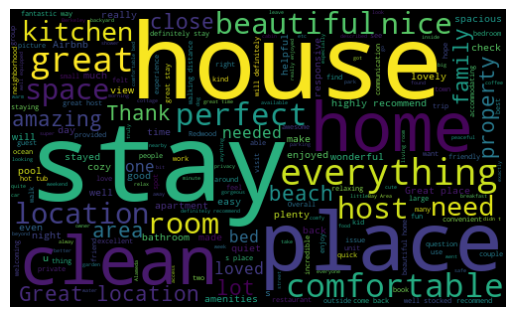

In [45]:
allWords = ' '.join([comment for comment in df_a['comments']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### using clean data

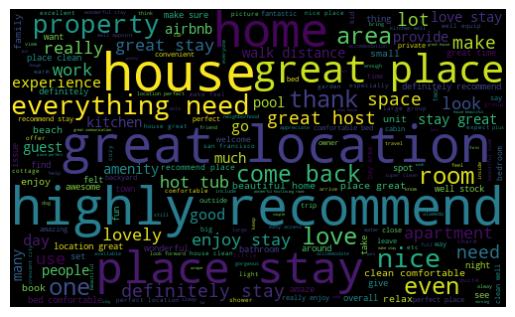

In [46]:
allWords = ' '.join([comment for comment in df_a['comments_clean']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
# add number of characters column
df_a["num_chars"] = df_a["comments_clean"].apply(lambda x: len(x))

# add number of words column
df_a["num_words"] = df_a["comments_clean"].apply(lambda x: len(x.split(" ")))

df_a[:4]


,commentIndex,hotelIndex,comments,rating,hotelName,...,address,senti_rating,comments_clean,num_chars,num_words
0,0,0,Our stay at the Redwood Riverwalk Hotel was awesome Even before arriving the staff made us feel welcome they were incredibly pet friendly they provided recommendations for the area they were efficient and warm in their communications and they offered to help in any way they could We arrived a lot later than expected and even though it was in the middle of the night the person at the front desk gave us a full intro explained features and amenities such as the off leash yard the dining areas laundry and...,5,"The Redwood, a boutique motel. Lumberjack room",...,"Fortuna, California, United States",Positive,stay redwood riverwalk hotel awesome even arrive staff make feel welcome incredibly pet friendly provide recommendation area efficient warm communication offer help way could arrive lot later expect even though middle night person front desk give full intro explain feature amenity leash yard din area laundry breakfast genuinely express warm wish stay room clean pleasantly furnish equipped liquid soap haircare lotion blow dryer iron full size iron board microwave fridge place everything king size bed c...,912,141
1,1,0,Fun and funky Would return again,5,"The Redwood, a boutique motel. Lumberjack room",...,"Fortuna, California, United States",Positive,fun funky would return,22,4
2,2,0,Booked a room with a jacuzzi but was given a room without this I raised it the next morning and the lady was apologetic and gave us a small refund,3,"The Redwood, a boutique motel. Lumberjack room",...,"Fortuna, California, United States",Negative,booked room jacuzzi give room without raise next morning lady apologetic give small refund,90,14
3,3,0,It was a decent stay A bit run down but concierge location,4,"The Redwood, a boutique motel. Lumberjack room",...,"Fortuna, California, United States",Positive,decent stay bit run concierge location,38,6


In [48]:
df_a['num_words'].describe()

count   37999.00
mean       24.54
std        26.52
min         1.00
25%         9.00
50%        17.00
75%        31.00
max       507.00
Name: num_words, dtype: float64

In [49]:
df_a['num_chars'].describe()

count   37999.00
mean      162.86
std       172.95
min         2.00
25%        60.00
50%       116.00
75%       206.00
max      3381.00
Name: num_chars, dtype: float64

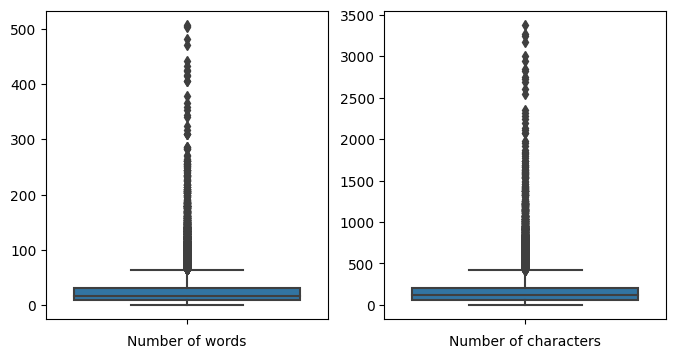

In [50]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))

sn.boxplot( y=df_a["num_words"],ax=ax[0]);
sn.boxplot( y=df_a["num_chars"],ax=ax[1]);

ax[0].set_xlabel("Number of words")
ax[1].set_xlabel("Number of characters")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
plt.show()



In [51]:
df_temp = df_a[(df_a['num_words'] >= 300)&(df_a['num_words'] <= 507)][['comments','hotelName','senti_rating']]
df_temp['senti_rating'].value_counts()

Negative    18
Positive     6
Name: senti_rating, dtype: int64

In [52]:
df_a[(df_a['num_words'] >= 300)&(df_a['num_words'] <= 507)][['num_words','comments','rating','senti_rating']].sort_values(by='num_words',ascending=False).reset_index()

,index,num_words,comments,rating,senti_rating
0,37578,507,I am frustrated annoyed and concerned If the Airbnb app would have let me I would have left a ZERO star review I don t even know where to begin We ultimately left the property within minutes of arrival due to serious safety concerns which I will describe later but will start with other numerous problems with this listing and the Host Inaccuracies in the listing are too numerous to count Wear and tear on the home was wide spread The property was described as years old and never lived in but I would add...,1,Negative
1,36922,505,Outdoor living space here is simply phenomenal Amazing pool spa water slide fire pit The fruit trees territorial views and seating areas are wonderful The outdoor kitchen is missing plumbing no running water at the sink and the igniter for the BBQ The outdoor refrigerator does work None of the festive decorative lights work The ones on the palms are actually cut and the others while plugged in do not work We wished these worked as the backyard illumination was a bit low Watch out for the bushes to the...,4,Positive
2,35523,503,Location location location Wow Great location that was convenient to all area attractions The view of the ocean and cliffs from the backyard was extraordinary The backyard itself was a great place to relax and just hang out barbecue dinner and enjoy the view Also a wonderful place to do smores our grandkids ages and had a blast The parking for up to cars was fantastic and needed for our visit Our host Turiya was excellent She was very responsive to texts questions etc and met us at check in She also p...,3,Negative
3,32886,481,THESE PEOPLE ARE LEGITIMATELY CON ARTISTS DO NOT STAY IN THIS AIRBNB UNDER ANY CIRCUMSTANCES PLEASE READ THIS THIS PLACE IS AN ACTUAL SCAM In summary multiple crucial appliances including fridge oven sound system and TV service were broken The advertised amenities like Pool and Jacuzzi were empty or dirty and unusable and every single person sent if at all to help fix an issue was either unreachable late inexplicably rude incompetent or worse yet admitted they were very high on drugs and unable to per...,1,Negative
4,17172,471,This house is the perfect launching pad to many local adventures Mystery of Trees Battery Point Lighthouse redwoods at Jedediah State Park South Beach Pebble Beach Ocean World to name a few Kitchen It is the most well stocked kitchen we ve ever rented with everything you could possibly need in the dining area crock pot blender knives tons of baking dishes measuring spoons etc just everything you d want with so much space for family to gather and help prepare the meal Dining Wonderful long table for ev...,5,Positive
5,28455,441,Our stay was lovely in the sense that the main house and backyard is very aesthetically pleasing especially the magnificent kitchen and definitely someplace that we would enjoy visiting for a day However our one week stay was NOT a five star experience which was the expectation that we had when paying close to per night We will not be recommending this property to our friends due to the following issues that detracted from our experience We do feel that all of these are addressable and preventable so ...,3,Negative
6,35787,433,I want to start this review by stating that this location in Sonoma was absolutely beautiful It was a very comfortable home to stay in The location was very easy to get to The rooms in the house were very clean and accommodating Everything that you need an Airbnb was available They had enough towels on hand the beds were comfortable the pillows were great The kitchen is fully stocked with everything that you could possibly need The aesthetic of the house was modern and very pretty Our family had a ver...,3,Negative
7,34233,426,We rented Bryan s property for nights in early December to celebrate my th birthday My biggest accommodations requirement was privacy and a chance to feel normal after almost two years of living in San Francisco

Text(0, 0.5, 'Number of words')

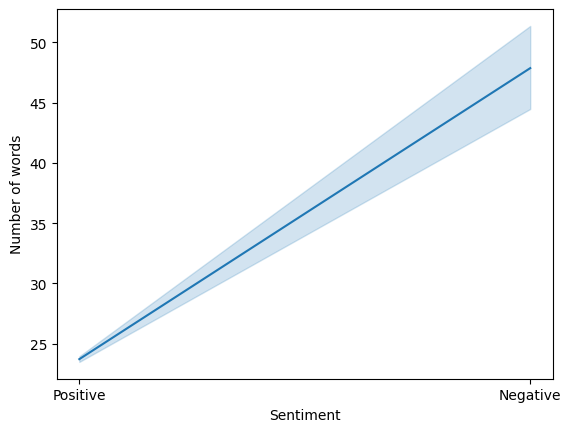

In [53]:
ax = sn.lineplot( x = "senti_rating",
             y = "num_words",
             data = df_a);
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of words")


#### Clearly as the words in the review increases, the negative sentiments become high

In [54]:
# Quantify sentiment

In [55]:
df_a['label'] = np.where(df_a['senti_rating']=='Positive',1,0)
df_a.tail(2)

,commentIndex,hotelIndex,comments,rating,hotelName,...,senti_rating,comments_clean,num_chars,num_words,label
38083,32,1499,the house is so beautiful and exactly like the pictures located in the most peaceful neighborhood and Jeffery was great with communication and any questions we had This is an amazing and historic home,5,Romantic Spanish Style Mansion in Pasadena.,...,Positive,house beautiful exactly like picture locate peaceful neighborhood jeffery great communication question amaze historic home,122,15,1
38084,33,1499,This historic Paul Williams house was visually stunning had excellent personal touches and made us feel like we were vacationing in a completely different area even though we live locally All of our questions were thoroughly answered the home was warm and inviting and there were a wide variety of entertainment options throughout the house Great views extremely well stocked kitchen and each room was unique and interesting,5,Romantic Spanish Style Mansion in Pasadena.,...,Positive,historic paul williams house visually stunning excellent personal touch make feel like vacation completely different area even though live locally question thoroughly answer home warm invite wide variety entertainment option throughout house great view extremely well stocked kitchen room unique interest,304,41,1


In [403]:
df_a.columns

Index(['commentIndex', 'hotelIndex', 'comments', 'rating', 'hotelName',
       'roomType', 'stars', 'address', 'senti_rating', 'comments_clean',
       'num_chars', 'num_words', 'label'],
      dtype='object')

#### DATA AUGMENTATION

In [56]:
df_a_neg = df_a[df_a['label']==0]
df_a_neg = df_a_neg[['comments','label']]

df_a_pos = df_a[df_a['label']==1]
df_a_pos = df_a_pos[['comments','label']]

neg_cnt = len(df_a_neg)
pos_cnt = len(df_a_pos)

print(neg_cnt)
print(pos_cnt)
new_message_df = pd.DataFrame()
iter_max = math.floor((pos_cnt*1.0)/neg_cnt)
print(iter_max)
aug = naw.SynonymAug(aug_src='wordnet',aug_max=20)
for comment in df_a_neg['comments']:
    new_messages = aug.augment(comment,n=iter_max)
    dummy2 = pd.DataFrame(new_messages, columns=['comments'])
    dummy2["label"] = 0
    new_message_df = new_message_df.append(dummy2)
new_message_df

1298
36701
28


,comments,label
0,Booked a elbow room with a jacuzzi but be given a elbow room without this I raised it the side by side sunup and the madam was apologetic and collapse us a small repayment,0
1,Booked a elbow room with a jacuzzi but was given a way without this 1 promote it the next dawn and the lady was apologetic and gave u a small repayment,0
2,Booked a way with a jacuzzi but was given a room without this I raised information technology the adjacent break of the day and the lady was excusatory and give us a small repayment,0
3,Booked a room with a jacuzzi only was pass on a way without this I arouse it the next sunrise and the ma'am was apologetic and gave us a lowly refund,0
4,Book a way with a jacuzzi merely was given a room without this I raised it the next daybreak and the lady make up apologetic and give us a little refund,0
...,...,...
23,The linens were highly old and did not smell salutary It was so bad I bought new pillows and pillow cases for both suite our family slept in The pillow had no protectors and were either flat or strong The towels were at least years sure enough and smelled Two of the rooms didn t have batteries in the smoke detectors The master room nightstands outlets didn t work The internet TV was spotty kept losing signal The couch and rugs and the entire rest home had a comic smell and looked dirty It s apparent t...,0
24,The linens were extremely erstwhile and did not smell good It was so bad Iodine bought new pillows and pillow cases for both rooms our family slept in The pillows had no protectors and were either flat or hard The towels were at least years old and smelled Two of the rooms didn triiodothyronine have batteries in the smoke detectors The master way nightstands outlets didn t work The internet TV was spotty observe losing signal The couch and rugs and the entire home had a funny smell and looked dirty It...,0
25,The linens were extremely old and did not smell good It be so bad 1 bought new pillows and pillow cases for both rooms our family slept in The pillows accept no protectors and were either vapid or hard The towels were at least years old and smelled Two of the rooms didn t have batteries in the smoke detectors The master room nightstands outlets didn t work The internet TV be spotty kept losing signal The lounge and rugs and the entire home had a funny smell and looked dirty It s apparent the owner giv...,0
26,The linens be extremely old and did not smell good It was thus bad I bought new pillows and pillow subject for both rooms our family slept in The pillows had no guardian and were either flat or hard The towels were at least years old and smelled Two of the rooms didn t have batteries in the smoke detectors The master way nightstands outlets didn t work The internet TV was spotty kept losing signaling The couch and rugs and the entire home had a funny smell and looked dirty It s apparent the owner has ...,0


In [405]:
#df_a_pos = df_a_pos.rename(columns={'comments_clean': 'comments'})

In [57]:
new_message_df.to_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/new_message_df.csv')

In [58]:
new_message_df = pd.read_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/new_message_df.csv')
new_message_df.head(2)

,Unnamed: 0,comments,label
0,0,Booked a elbow room with a jacuzzi but be given a elbow room without this I raised it the side by side sunup and the madam was apologetic and collapse us a small repayment,0
1,1,Booked a elbow room with a jacuzzi but was given a way without this 1 promote it the next dawn and the lady was apologetic and gave u a small repayment,0


In [59]:
new_message_df = new_message_df.drop(columns=['Unnamed: 0'])
new_message_df

,comments,label
0,Booked a elbow room with a jacuzzi but be given a elbow room without this I raised it the side by side sunup and the madam was apologetic and collapse us a small repayment,0
1,Booked a elbow room with a jacuzzi but was given a way without this 1 promote it the next dawn and the lady was apologetic and gave u a small repayment,0
2,Booked a way with a jacuzzi but was given a room without this I raised information technology the adjacent break of the day and the lady was excusatory and give us a small repayment,0
3,Booked a room with a jacuzzi only was pass on a way without this I arouse it the next sunrise and the ma'am was apologetic and gave us a lowly refund,0
4,Book a way with a jacuzzi merely was given a room without this I raised it the next daybreak and the lady make up apologetic and give us a little refund,0
...,...,...
36339,The linens were highly old and did not smell salutary It was so bad I bought new pillows and pillow cases for both suite our family slept in The pillow had no protectors and were either flat or strong The towels were at least years sure enough and smelled Two of the rooms didn t have batteries in the smoke detectors The master room nightstands outlets didn t work The internet TV was spotty kept losing signal The couch and rugs and the entire rest home had a comic smell and looked dirty It s apparent t...,0
36340,The linens were extremely erstwhile and did not smell good It was so bad Iodine bought new pillows and pillow cases for both rooms our family slept in The pillows had no protectors and were either flat or hard The towels were at least years old and smelled Two of the rooms didn triiodothyronine have batteries in the smoke detectors The master way nightstands outlets didn t work The internet TV was spotty observe losing signal The couch and rugs and the entire home had a funny smell and looked dirty It...,0
36341,The linens were extremely old and did not smell good It be so bad 1 bought new pillows and pillow cases for both rooms our family slept in The pillows accept no protectors and were either vapid or hard The towels were at least years old and smelled Two of the rooms didn t have batteries in the smoke detectors The master room nightstands outlets didn t work The internet TV be spotty kept losing signal The lounge and rugs and the entire home had a funny smell and looked dirty It s apparent the owner giv...,0
36342,The linens be extremely old and did not smell good It was thus bad I bought new pillows and pillow subject for both rooms our family slept in The pillows had no guardian and were either flat or hard The towels were at least years old and smelled Two of the rooms didn t have batteries in the smoke detectors The master way nightstands outlets didn t work The internet TV was spotty kept losing signaling The couch and rugs and the entire home had a funny smell and looked dirty It s apparent the owner has ...,0


#### Word cloud of Positive sentiments

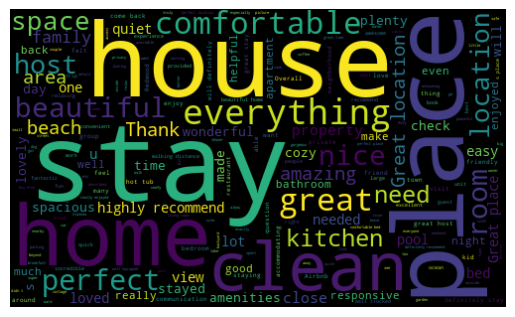

In [60]:
allWords = ' '.join([comment for comment in df_a_pos['comments']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Word cloud of Negative sentiments

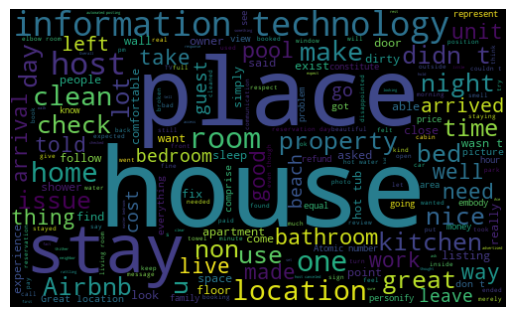

In [61]:
allWords = ' '.join([comment for comment in new_message_df['comments']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
df_unbiased = pd.DataFrame()
df_unbiased = df_unbiased.append([df_a_pos, new_message_df])


In [64]:
df_unbiased = df_unbiased.sample(frac=1)
df_unbiased = df_unbiased.reset_index(drop=True)

In [65]:
df_unbiased.head(5)

,comments,label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0
2,Had a good stay at Lucy,0
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,1
4,Process was very smooth Location is convenient for work in Oakland Berkeley or Emeryville but the neighborhood on its own is pretty underwhelming Neighbors were very noisy,1


In [68]:
df_unbiased.to_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_unbiased.csv')

In [69]:
df_vec = pd.read_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_unbiased.csv')
df_vec.head(2)

,Unnamed: 0,comments,label
0,0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0
1,1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0


In [70]:
df_vec = df_vec.drop(columns=['Unnamed: 0'])


In [71]:
df_vec.head(2)

,comments,label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0


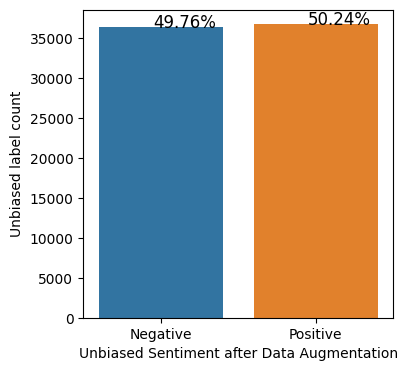

In [73]:
plt.figure(figsize=(4,4))
ax= sn.countplot(x='label',data = df_vec)
ax.set(xticklabels = (['Negative', 'Positive']))
ax.set_ylabel("Unbiased label count")
ax.set_xlabel("Unbiased Sentiment after Data Augmentation")
annotate_perc(ax,df_vec.label)

In [74]:
df_vec.to_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_vec.csv')

In [75]:
df_vec = pd.read_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_vec.csv')
df_vec.head(2)

,Unnamed: 0,comments,label
0,0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0
1,1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0


In [76]:
df_vec = df_vec.drop(columns=['Unnamed: 0'])


In [77]:
df_vec.head(2)

,comments,label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0


### MODEL TRAINING

### NLP Models -  VADER, TEXTBLOB, FLAIR

### Rule based Analyzer - VADER
#### VADER is a popular rule-based sentiment analyzer. 

#### It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.   

#### Vader sentiment returns the probability of a given input sentence to be Positive, Negative, and Neutral[0,1]. It also gives compound score - overall sentiment[-1,1].Vader outputs something like this:{'neg': 0.209, 'neu': 0.299, 'pos': 0.493, 'compound': 0.4404}
#### The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [105]:
# Classify the sentiment 
def make_labels(df, feature,value):
    print("feature : ",feature,"  value  :",value)
    # we take neutral and negative together 
    df.loc[df[value] >= 0.5,feature] = 1
    df.loc[df[value] < 0.5,feature] = 0
    

In [106]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()
def vader_sentiment_analysis(df):
    df_vec['vader_scores'] = df_vec['comments'].apply(lambda x: sid.polarity_scores(x))
    df_vec['vader_compound'] = df_vec['vader_scores'].apply(lambda d: d['compound'])
    make_labels(df_vec,'vader_label','vader_compound')

In [107]:
# VADER on comments
start = time.time()
vader_sentiment_analysis(df_vec)
#df_a = pd.concat([df_a.drop(['vader_scores'], axis=1), df_a['vader_scores'].apply(pd.Series)], axis=1)
stop = time.time()
vader_time = round((stop-start)/60, 3)
print(f'VADER took: {vader_time} minutes')

df_vec['vader_label'] = df_vec['vader_label'].astype(int)
df_vec[['comments','vader_scores','vader_compound','label','vader_label']].head(8)

feature :  vader_label   value  : vader_compound
VADER took: 1.036 minutes


,comments,vader_scores,vader_compound,label,vader_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,"{'neg': 0.104, 'neu': 0.858, 'pos': 0.037, 'compound': -0.9429}",-0.94,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,"{'neg': 0.013, 'neu': 0.835, 'pos': 0.151, 'compound': 0.9509}",0.95,0,1
2,Had a good stay at Lucy,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}",0.44,0,0
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,"{'neg': 0.038, 'neu': 0.645, 'pos': 0.317, 'compound': 0.9513}",0.95,1,1
4,Process was very smooth Location is convenient for work in Oakland Berkeley or Emeryville but the neighborhood on its own is pretty underwhelming Neighbors were very noisy,"{'neg': 0.078, 'neu': 0.786, 'pos': 0.135, 'compound': 0.4235}",0.42,1,0
5,Discomfit w my experienceFire place didnt workThe BBQ didnt workThe jacuzzi didnt workThese are real important emenities that should cost point prohibited on app that they dont work Also Julian would not get backward to,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compound': 0.2023}",0.20,0,0
6,Communication represent great It was a perfect little spot for two people to string up at while breaking up their activities in San Diego The area exist a small sketchy just the affiliated service department parking helped us feel more comfortable We do wish there was a more set amount of money of glassware for drinks but that wasnt the conclusion of the world The whole did mother a bit stuffy even with all the window open Very well heeled layer Probably one and only of the good we feature slept on,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.9323}",0.93,0,1
7,The horde call off this reservation days before arrival This equal an automated notice,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,0,0


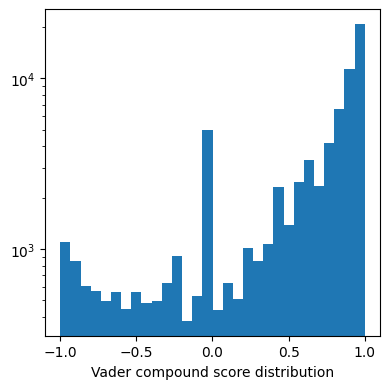

In [109]:
fig,ax = plt.subplots(figsize=(4,4))
ax.hist(df_vec['vader_compound'],bins=30,log=True);
ax.set_xlabel('Vader compound score distribution')
plt.tight_layout()
plt.show()


In [157]:
Per_of_pos = round((df_vec[df_vec.vader_label == 1].count()/df_vec.shape[0])*100,3)
Per_of_neg = round((df_vec[df_vec.vader_label == 0].count()/df_vec.shape[0])*100,3)
print(Per_of_pos.vader_label,Per_of_neg.vader_label)

71.037 28.963


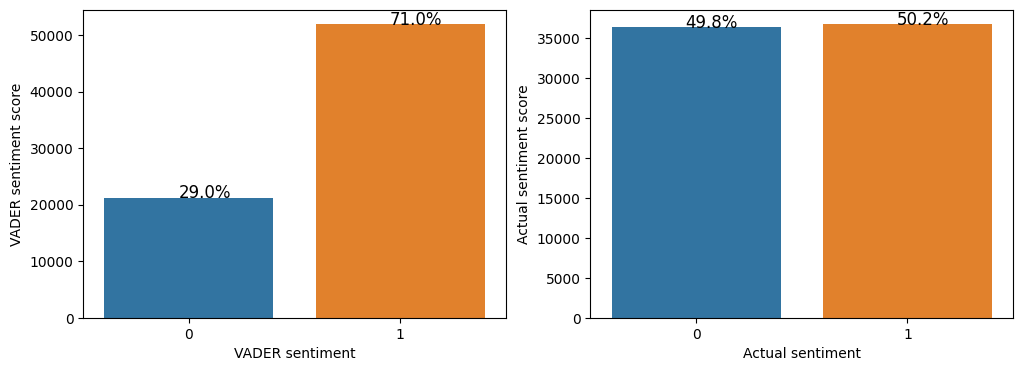

'\nfig,ax = plt.subplots(ncols=2,figsize=(12,4))\nsn.countplot(x=\'vader_label\',data = df_vec,ax = ax[0])\nax[0].set_ylabel("VADER sentiment score")\nax[0].set_xlabel("VADER sentiment")\nsn.countplot(x=\'label\',data = df_vec,ax = ax[1])\nax[1].set_ylabel("ACTUAL sentiment score")\nax[1].set_xlabel("Actual sentiment")\nplt.show()\n'

In [125]:
lab = ["vader","actual"]
fig,ax_two = plt.subplots(ncols=2,figsize=(12,4))
for ax,lab in zip(np.ravel(ax_two),lab):
    if lab == "vader":
        sn.countplot(x='vader_label',data = df_vec,ax = ax)
        ax.set_ylabel("VADER sentiment score")
        ax.set_xlabel("VADER sentiment")
        annotate_perc(ax, df_vec.vader_label)
    elif lab == "actual":
        sn.countplot(x='label',data = df_vec,ax = ax)
        ax.set_ylabel("Actual sentiment score")
        ax.set_xlabel("Actual sentiment")
        annotate_perc(ax, df_vec.label)

plt.show()


#### EVALUATION METRICS  of Vader

In [110]:
# Evaluate results
print("VADER MODEL")
print("-"*80)
print("-"*80)
accur_vader = round(accuracy_score(df_vec.dropna()["label"].values, df_vec.dropna()["vader_label"].values),2)
print(f'Accuracy: {accur_vader}')
print("-"*80)
print("Confusion metric: ")
print(confusion_matrix(df_vec['label'].values, df_vec['vader_label'].values))
print("-"*80)
print('\nClasification report:\n', classification_report(df_vec['label'].values, df_vec['vader_label'].values))


VADER MODEL
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy: 0.73
--------------------------------------------------------------------------------
Confusion metric: 
[[19049 17295]
 [ 2107 34594]]
--------------------------------------------------------------------------------

Clasification report:
               precision    recall  f1-score   support

           0       0.90      0.52      0.66     36344
           1       0.67      0.94      0.78     36701

    accuracy                           0.73     73045
   macro avg       0.78      0.73      0.72     73045
weighted avg       0.78      0.73      0.72     73045



In [113]:
df_vec = df_vec.drop(columns=['vader_scores','vader_compound'])


,comments,label,vader_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1


### Rule based sentiment Analyzer - TEXTBLOB 
#### Rule Based Sentiment Analyzer - Textblob
#### TextBlob is a python library that offers API access to different NLP tasks such as sentiment analysis, spelling correction, etc.

#### Textblob sentiment analyzer returns two properties for a given input sentence: 

#### Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
#### Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [114]:
# Textblob Polarity and subjectivity on comments
def textblob_sentiment_analysis_com(dataframe):
    df_vec['textblob_pol'] = df_vec['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
    #df_vec['textblob_sub'] = df_a['comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    make_labels(df_vec, 'textblob_label','textblob_pol')


In [115]:
start = time.time()
textblob_sentiment_analysis_com(df_vec)
stop = time.time()
textblob_time = round((stop-start)/60, 3)
df_vec['textblob_label'] = df_vec['textblob_label'].astype(int)
print(f'Textblob took: {textblob_time} minutes')
df_vec.head(8)

feature :  textblob_label   value  : textblob_pol
Textblob took: 0.59 minutes


,comments,label,vader_label,textblob_pol,textblob_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0.17,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0.23,0
2,Had a good stay at Lucy,0,0,0.70,1
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,1,1,0.60,1
4,Process was very smooth Location is convenient for work in Oakland Berkeley or Emeryville but the neighborhood on its own is pretty underwhelming Neighbors were very noisy,1,0,0.39,0
5,Discomfit w my experienceFire place didnt workThe BBQ didnt workThe jacuzzi didnt workThese are real important emenities that should cost point prohibited on app that they dont work Also Julian would not get backward to,0,0,0.60,1
6,Communication represent great It was a perfect little spot for two people to string up at while breaking up their activities in San Diego The area exist a small sketchy just the affiliated service department parking helped us feel more comfortable We do wish there was a more set amount of money of glassware for drinks but that wasnt the conclusion of the world The whole did mother a bit stuffy even with all the window open Very well heeled layer Probably one and only of the good we feature slept on,0,1,0.32,0
7,The horde call off this reservation days before arrival This equal an automated notice,0,0,0.00,0


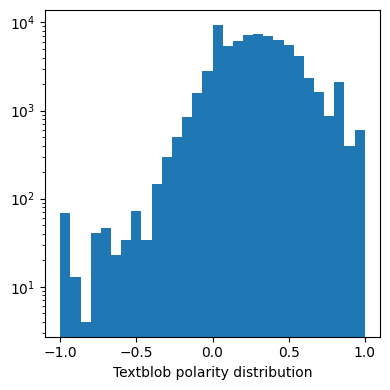

In [116]:
fig,ax = plt.subplots(figsize=(4,4))
ax.hist(df_vec['textblob_pol'],bins=30,log=True);
ax.set_xlabel('Textblob polarity distribution')
plt.tight_layout()
plt.show()

In [120]:
df_vec['textblob_label'].value_counts()

0    58023
1    15022
Name: textblob_label, dtype: int64

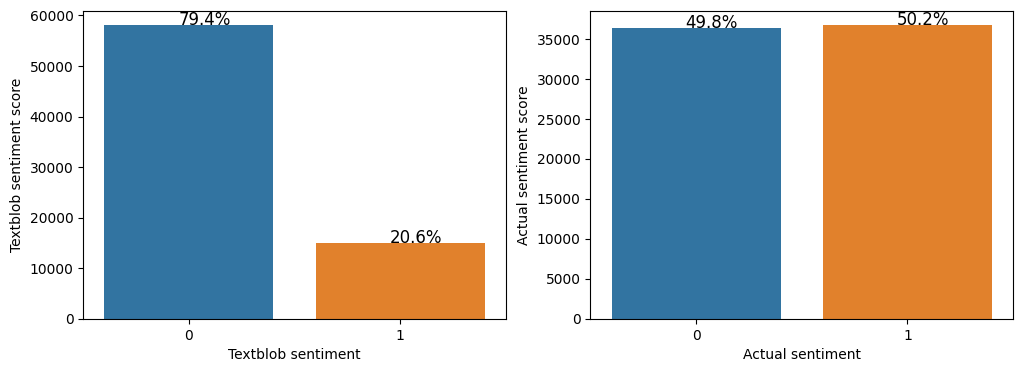

In [127]:
lab = ["textblob","actual"]
fig,ax_two = plt.subplots(ncols=2,figsize=(12,4))
for ax,lab in zip(np.ravel(ax_two),lab):
    if lab == "textblob":
        sn.countplot(x='textblob_label',data = df_vec,ax = ax)
        ax.set_ylabel("Textblob sentiment score")
        ax.set_xlabel("Textblob sentiment")
        annotate_perc(ax, df_vec.textblob_label)
    elif lab == "actual":
        sn.countplot(x='label',data = df_vec,ax = ax)
        ax.set_ylabel("Actual sentiment score")
        ax.set_xlabel("Actual sentiment")
        annotate_perc(ax, df_vec.label)

plt.show()


####  EVALUATION METRICS  of Textblob

In [122]:
# Evaluate results
print("Textblob")
print("-"*80)
print("-"*80)
accur_textblob = round(accuracy_score(df_vec["label"].values, df_vec["textblob_label"].values),2)
print(f'Accuracy: {accur_textblob}')
print("-"*80)
print("Confusion metric: ")
print(confusion_matrix(df_vec['label'].values, df_vec['textblob_label'].values))
print("-"*80)
print('\nClasification report:\n', classification_report(df_vec['label'].values, df_vec['textblob_label'].values))


Textblob
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy: 0.64
--------------------------------------------------------------------------------
Confusion metric: 
[[33945  2399]
 [24078 12623]]
--------------------------------------------------------------------------------

Clasification report:
               precision    recall  f1-score   support

           0       0.59      0.93      0.72     36344
           1       0.84      0.34      0.49     36701

    accuracy                           0.64     73045
   macro avg       0.71      0.64      0.60     73045
weighted avg       0.71      0.64      0.60     73045



In [129]:
df_vec = df_vec.drop(columns=['textblob_pol','flair_score'])
df_vec.head(4)

,comments,label,vader_label,textblob_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0
2,Had a good stay at Lucy,0,0,1
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,1,1,1


### Embedding based model - FLAIR

#### Text embeddings are a form of word representation in NLP in which synonymically similar words are represented using similar vectors which when represented in an n-dimensional space will be close to each other.

#### Flair provided various functionalities such as pre-trained sentiment analysis models, text embeddings, NER, and more.
#### Flair has a score ranging from 0 to 1, where 0 means very unconfident about the prediction and 1 means very confident about the prediction.

In [132]:
classifier = TextClassifier.load('en-sentiment')

def processSentenceScore(x):
    comment_proc=Sentence(str(x));
    classifier.predict(comment_proc);
        
    total_sentiment = comment_proc.labels[0]
    value = total_sentiment.value
    if value == 'POSITIVE':
        result = round(total_sentiment.score,4)
    else:
        result = round(-(total_sentiment.score),4)
    return result;

def processCommentSentiment(x):
    comment_proc=Sentence(str(x));
    classifier.predict(comment_proc);
    total_sentiment = comment_proc.labels[0]
    value = total_sentiment.value
    return value;

start = time.time()
df_vec["flair_label"] = df_vec["comments"].apply(lambda x: processCommentSentiment(x))
df_vec['flair_label'] = np.where(df_vec['flair_label']=='POSITIVE',1,0)
stop = time.time()
flair_time = round((stop-start)/60, 3)
print(f'Flair took: {flair_time} minutes')
df_vec.head(2)



2022-11-27 15:28:29,544 loading file C:\Users\bhati\.flair\models\sentiment-en-mix-distillbert_4.pt
Flair took: 47.636 minutes


,comments,label,vader_label,textblob_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0
2,Had a good stay at Lucy,0,0,1
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,1,1,1


In [133]:
df_vec.head(5)

,comments,label,vader_label,textblob_label,flair_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0,0
2,Had a good stay at Lucy,0,0,1,1
3,We had an amazing time here The cabin is secluded in the woods and appears to be very recently built Great appliances a comfy bed and the vaulted ceiling was nice The bathroom is very nice and the shower had great water pressure,1,1,1,1
4,Process was very smooth Location is convenient for work in Oakland Berkeley or Emeryville but the neighborhood on its own is pretty underwhelming Neighbors were very noisy,1,0,0,0


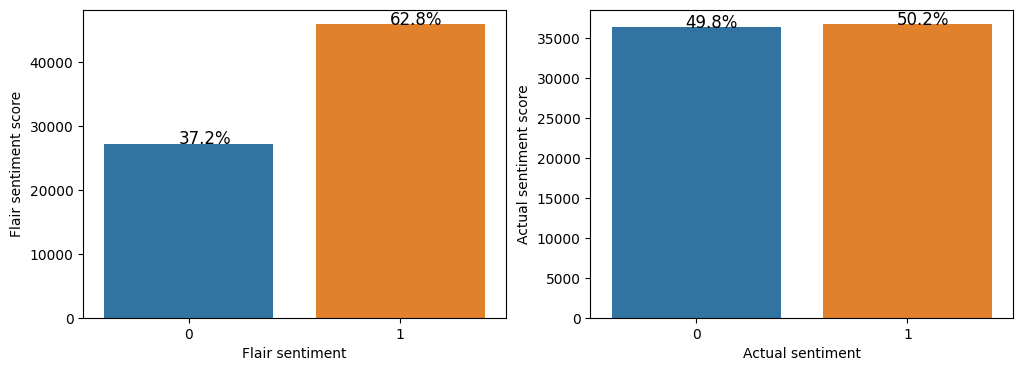

In [135]:
lab = ["flair","actual"]
fig,ax_two = plt.subplots(ncols=2,figsize=(12,4))
for ax,lab in zip(np.ravel(ax_two),lab):
    if lab == "flair":
        sn.countplot(x='flair_label',data = df_vec,ax = ax)
        ax.set_ylabel("Flair sentiment score")
        ax.set_xlabel("Flair sentiment")
        annotate_perc(ax, df_vec.flair_label)
    elif lab == "actual":
        sn.countplot(x='label',data = df_vec,ax = ax)
        ax.set_ylabel("Actual sentiment score")
        ax.set_xlabel("Actual sentiment")
        annotate_perc(ax, df_vec.label)

plt.show()


#### EVALUATION METRICS of Flair Model

In [137]:
# Evaluate results
print("Flair")
print("-"*80)
print("-"*80)
accur_flair = round(accuracy_score(df_vec["label"].values, df_vec["flair_label"].values),2)
print(f'Accuracy: {accur_flair}')
print("-"*80)
print("Confusion metric: ")
print(confusion_matrix(df_vec['label'].values, df_vec['flair_label'].values))
print("-"*80)
print('\nClasification report:\n', classification_report(df_vec['label'].values, df_vec['flair_label'].values))


Flair
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy: 0.85
--------------------------------------------------------------------------------
Confusion metric: 
[[26345  9999]
 [  841 35860]]
--------------------------------------------------------------------------------

Clasification report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83     36344
           1       0.78      0.98      0.87     36701

    accuracy                           0.85     73045
   macro avg       0.88      0.85      0.85     73045
weighted avg       0.88      0.85      0.85     73045



### FLAIR Model gives better results than Vader and Textblob 

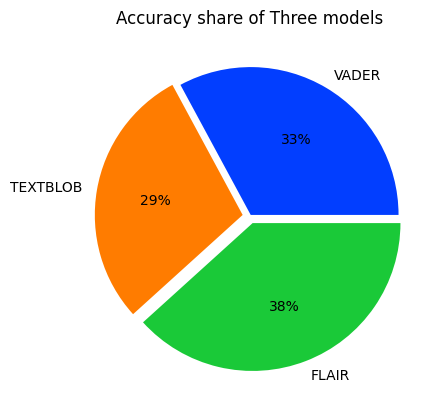

In [141]:
# declaring data
data = [accur_vader, accur_textblob, accur_flair]
keys = ['VADER', 'TEXTBLOB', 'FLAIR']
  
# declaring exploding pie
explode = [0.01, 0.05, 0.05]
# define Seaborn color palette to use
#palette_color = sn.color_palette('light')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode,autopct='%.0f%%')
plt.title("Accuracy share of Three models")
# displaying chart
plt.show()

###### EXECUTION TIME OF THREE MODELS

Text(0.5, 1.0, 'Time Taken by Each Analyzer')

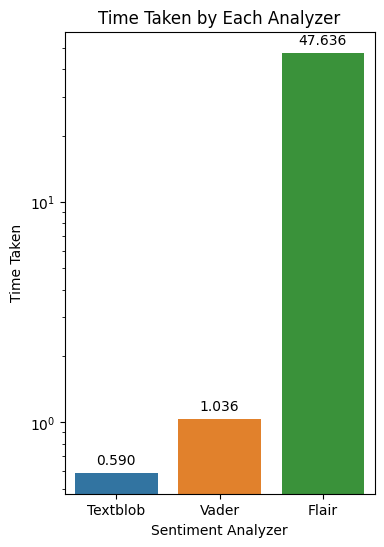

In [142]:
x = ["Textblob","Vader","Flair"]
y = [textblob_time,vader_time,flair_time]

fig,ax= plt.subplots(figsize=(4,6))
ax = sn.barplot(x=x, y=y,log=True,errwidth=0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_ylabel("Time Taken")
ax.set_xlabel("Sentiment Analyzer")
ax.set_title("Time Taken by Each Analyzer")

In [144]:
df_vec.to_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_vec_nltk.csv')

In [145]:
df_vec = pd.read_csv('C:/vIDUSHI/SJSU/Data245 - ML/Project/cleanedDataset/df_vec_nltk.csv')
df_vec.head(2)

,Unnamed: 0,comments,label,vader_label,textblob_label,flair_label
0,0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0,0
1,1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0,0


In [146]:
df_vec = df_vec.drop(columns=['Unnamed: 0'])


,comments,label,vader_label,textblob_label,flair_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0,0


In [158]:
df_vec.head(2)

,comments,label,vader_label,textblob_label,flair_label
0,The place is fine Nothing fancy The week I be there it was unbearably hot and there is no A C To be average the listing coiffure show this when you click more creature comforts merely it is non advertised as so unless you are looking for it I had to get under one's skin some work done during the 24 hour interval so the desk looked perfect It was so hot that I ended up working from my railway car The manager has in person never been there during Summertime Heat rises and the situation is basically on a...,0,0,0,0
1,Gorgeous Aspect Very accommodating since we booked final minute after another booking getting double booked done Hidden by Airbnb The house be all right wasnt the cleanest Dirty floor and the furniture was torn and come apart Our kids pushed some clobber nether the couch and ther were some hidden treasures nether there Had some issues with the appliances but the owners are working on that Laundry room area had a very unattackable mold aroma and the dryer was full of linen It was great for what we need...,0,1,0,0


### Machine Learning Classifier models

In [203]:
# clean text data
start = time.time()
df_vec["comments_clean"] = df_vec["comments"].apply(lambda x: clean_comment(x))
stop = time.time()
print(f'Cleaning took: {round((stop-start)/60, 3)} minutes')

Cleaning took: 2.946 minutes


In [206]:
X=df_vec['comments_clean']
y=df_vec['label']


In [207]:
df_vec.shape, X.shape,y.shape,np.unique(y)

((73045, 6), (73045,), (73045,), array([0, 1], dtype=int64))

In [208]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=.5)

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
def get_transformed_countv(X):
    estimators=[('vectorizer', CountVectorizer(max_features=100000,ngram_range=(1, 2)))]
    preprocessing_pipeline=Pipeline(estimators)
    X_train_transformed=preprocessing_pipeline.fit_transform(X)#[0:5])
    return X_train_transformed,preprocessing_pipeline

In [210]:
def get_transformed_tfidf(X):
    estimators=[('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 2)))]
    preprocessing_pipeline=Pipeline(estimators)
    X_train_transformed=preprocessing_pipeline.fit_transform(X)#[0:5])
    return X_train_transformed,preprocessing_pipeline

In [211]:
def get_models():
    models = dict()
    models['LogRegression'] = LogisticRegression()
    models['KNN'] = KNeighborsClassifier()
    models['DecisionTree'] = DecisionTreeClassifier()
    #models['svm'] = SVC()
    models['Bayes'] = MultinomialNB()
    models['Bagging'] = BaggingClassifier()
    models['RandomForest'] = RandomForestClassifier(n_estimators = 100)
    models['XGB'] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    models['AdaBoost'] = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    
    return models

In [212]:
def make_rocauc(model,X_test_transformed,y_test):
    class_probabilities = model.predict_proba(X_test_transformed)
    preds = class_probabilities[:, 1]

    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # Printing AUC
    print(f"AUC for our classifier is: {round(roc_auc,3)}")

    # Plotting the ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

cnt test : [0.982]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: LogRegression
Accuracy score: 0.982
Train Score: 0.996
Test Score: 0.982
Time: 1.787
Confusion metric: 
[[17914   295]
 [  351 17963]]


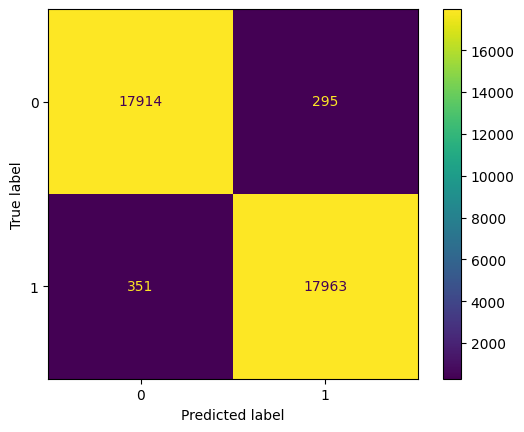

Precision Score of the classifier is: 0.984
Recall Score of the classifier is: 0.981
F1 Score of the classifier is: 0.982
AUC for our classifier is: 0.998


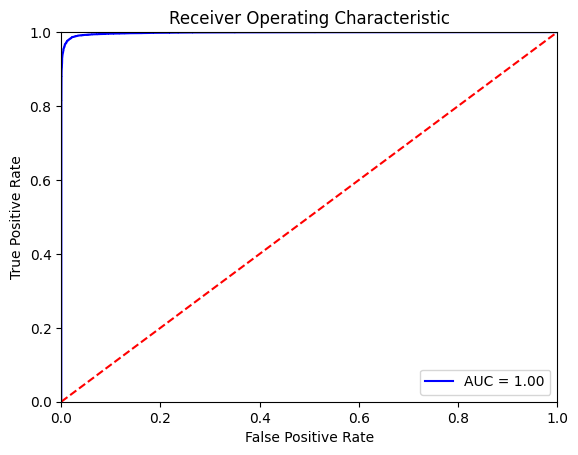

cnt test : [0.982, 0.914]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: KNN
Accuracy score: 0.914
Train Score: 0.949
Test Score: 0.914
Time: 115.479
Confusion metric: 
[[17013  1196]
 [ 1958 16356]]


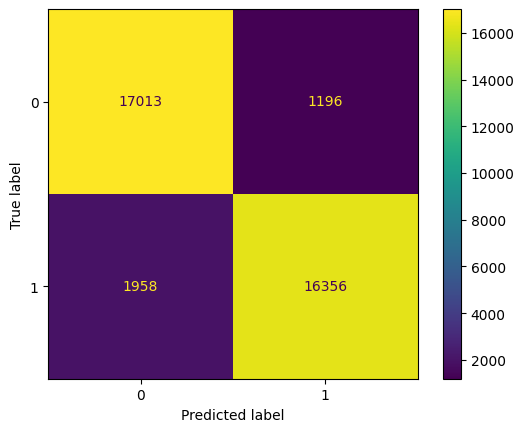

Precision Score of the classifier is: 0.932
Recall Score of the classifier is: 0.893
F1 Score of the classifier is: 0.912
AUC for our classifier is: 0.971


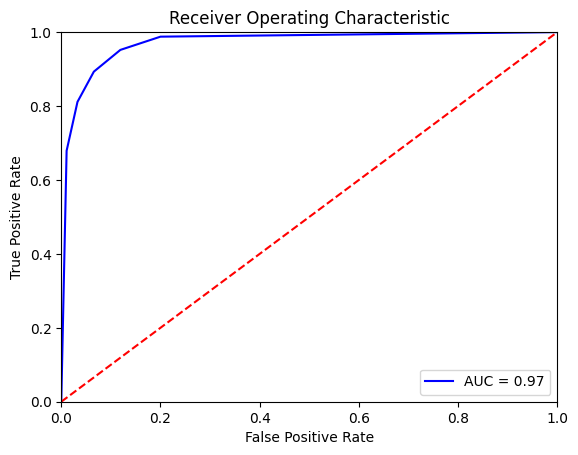

cnt test : [0.982, 0.914, 0.934]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: DecisionTree
Accuracy score: 0.934
Train Score: 0.998
Test Score: 0.934
Time: 18.333
Confusion metric: 
[[17104  1105]
 [ 1310 17004]]


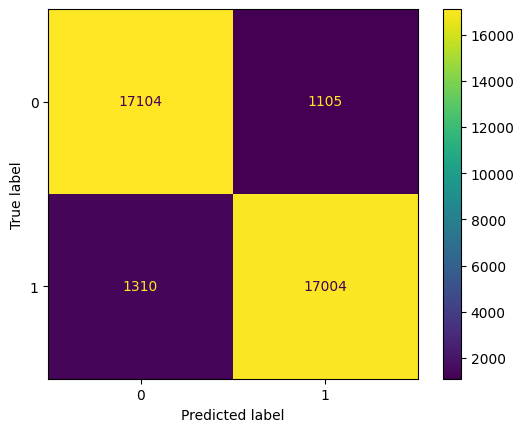

Precision Score of the classifier is: 0.939
Recall Score of the classifier is: 0.928
F1 Score of the classifier is: 0.934
AUC for our classifier is: 0.939


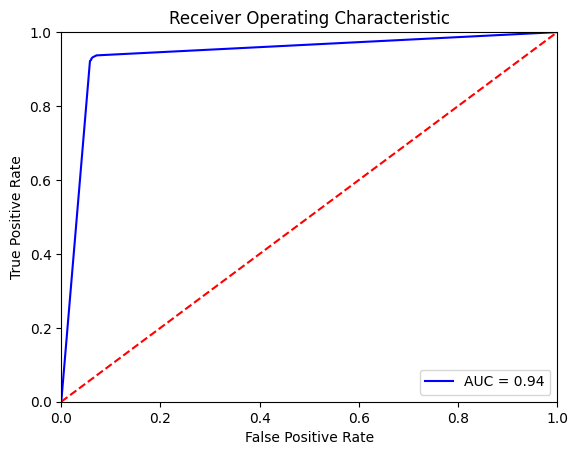

cnt test : [0.982, 0.914, 0.934, 0.969]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: Bayes
Accuracy score: 0.969
Train Score: 0.973
Test Score: 0.969
Time: 0.057
Confusion metric: 
[[17294   915]
 [  208 18106]]


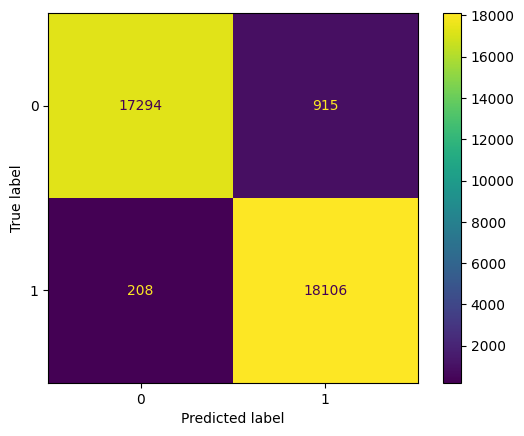

Precision Score of the classifier is: 0.952
Recall Score of the classifier is: 0.989
F1 Score of the classifier is: 0.97
AUC for our classifier is: 0.996


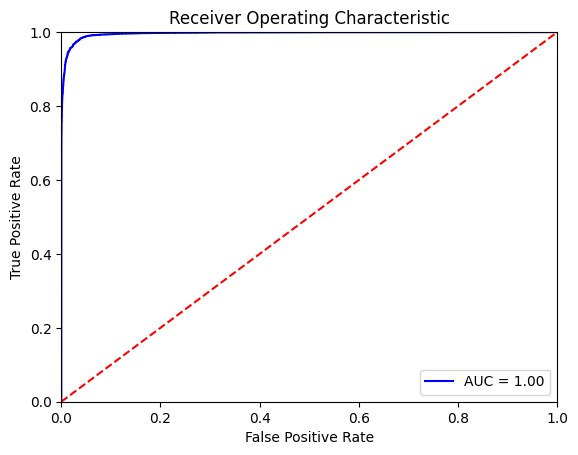

cnt test : [0.982, 0.914, 0.934, 0.969, 0.95]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: Bagging
Accuracy score: 0.95
Train Score: 0.995
Test Score: 0.95
Time: 157.91
Confusion metric: 
[[17495   714]
 [ 1112 17202]]


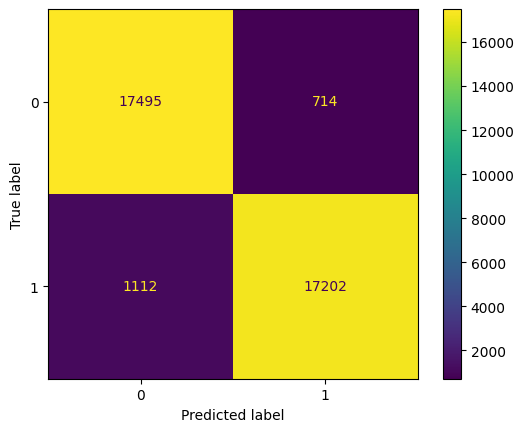

Precision Score of the classifier is: 0.96
Recall Score of the classifier is: 0.939
F1 Score of the classifier is: 0.95
AUC for our classifier is: 0.986


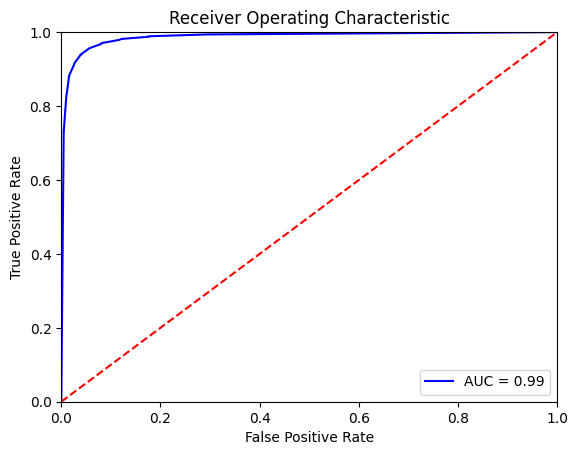

cnt test : [0.982, 0.914, 0.934, 0.969, 0.95, 0.986]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: RandomForest
Accuracy score: 0.986
Train Score: 0.998
Test Score: 0.986
Time: 203.642
Confusion metric: 
[[18033   176]
 [  322 17992]]


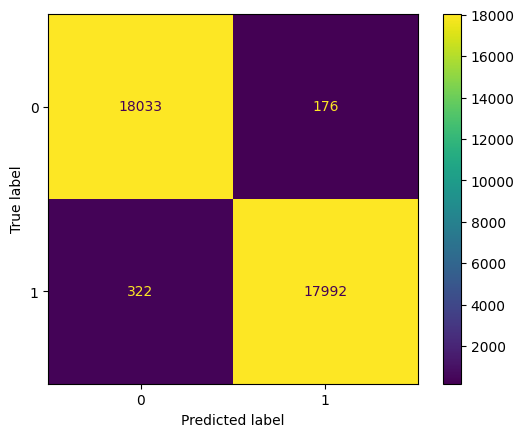

Precision Score of the classifier is: 0.99
Recall Score of the classifier is: 0.982
F1 Score of the classifier is: 0.986
AUC for our classifier is: 0.998


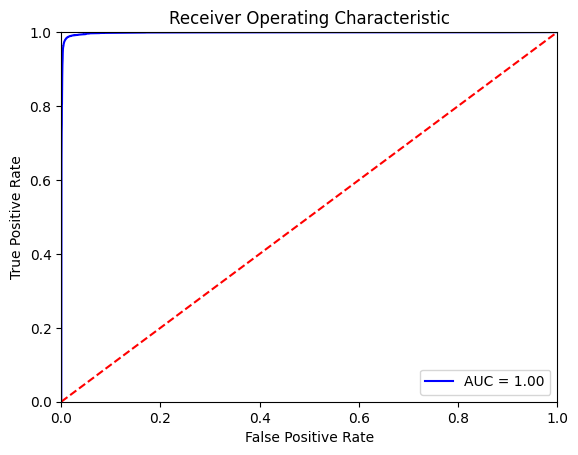

cnt test : [0.982, 0.914, 0.934, 0.969, 0.95, 0.986, 0.953]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: XGB
Accuracy score: 0.953
Train Score: 0.965
Test Score: 0.953
Time: 2.062
Confusion metric: 
[[17265   944]
 [  768 17546]]


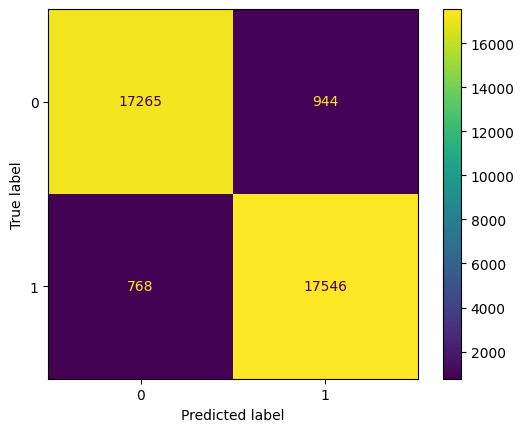

Precision Score of the classifier is: 0.949
Recall Score of the classifier is: 0.958
F1 Score of the classifier is: 0.953
AUC for our classifier is: 0.992


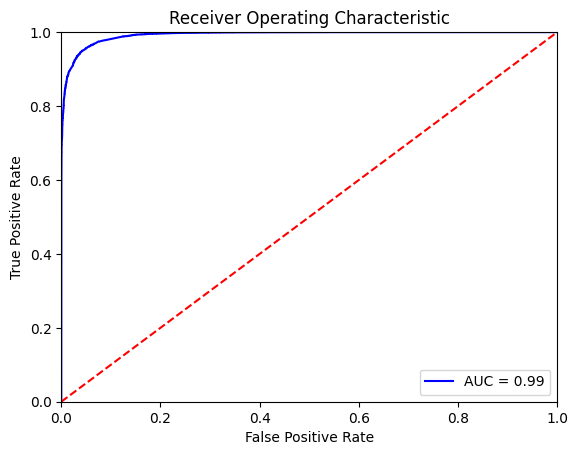

cnt test : [0.982, 0.914, 0.934, 0.969, 0.95, 0.986, 0.953, 0.889]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  CountVec
Name of the model: AdaBoost
Accuracy score: 0.889
Train Score: 0.889
Test Score: 0.889
Time: 8.981
Confusion metric: 
[[15982  2227]
 [ 1834 16480]]


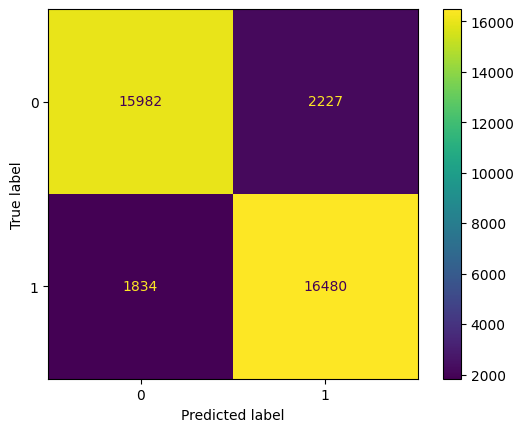

Precision Score of the classifier is: 0.881
Recall Score of the classifier is: 0.9
F1 Score of the classifier is: 0.89
AUC for our classifier is: 0.957


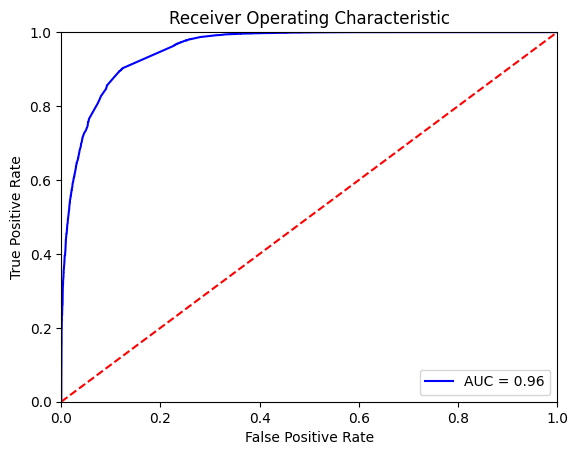

tdidf test : [0.977]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: LogRegression
Accuracy score: 0.977
Train Score: 0.986
Test Score: 0.977
Time: 1.772
Confusion metric: 
[[17920   289]
 [  567 17747]]


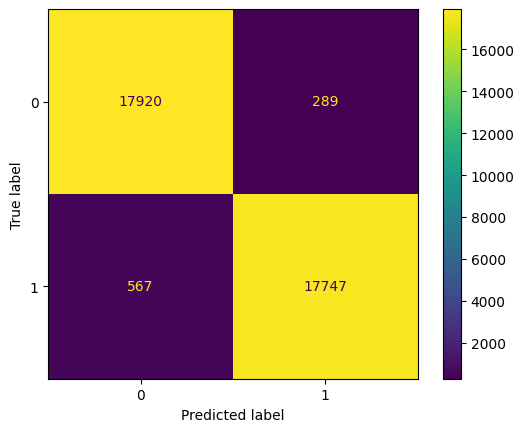

Precision Score of the classifier is: 0.984
Recall Score of the classifier is: 0.969
F1 Score of the classifier is: 0.976
AUC for our classifier is: 0.997


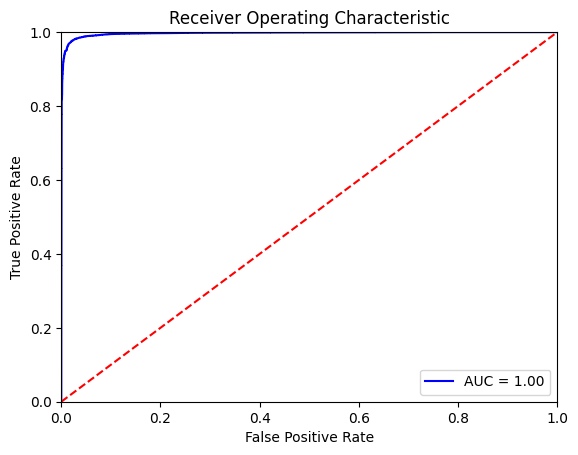

tdidf test : [0.977, 0.591]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: KNN
Accuracy score: 0.591
Train Score: 0.695
Test Score: 0.591
Time: 109.779
Confusion metric: 
[[17841   368]
 [14572  3742]]


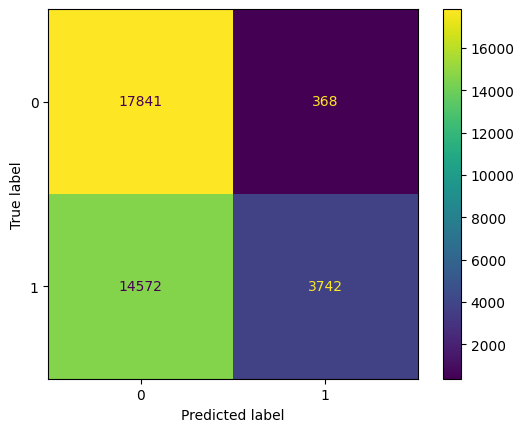

Precision Score of the classifier is: 0.91
Recall Score of the classifier is: 0.204
F1 Score of the classifier is: 0.334
AUC for our classifier is: 0.852


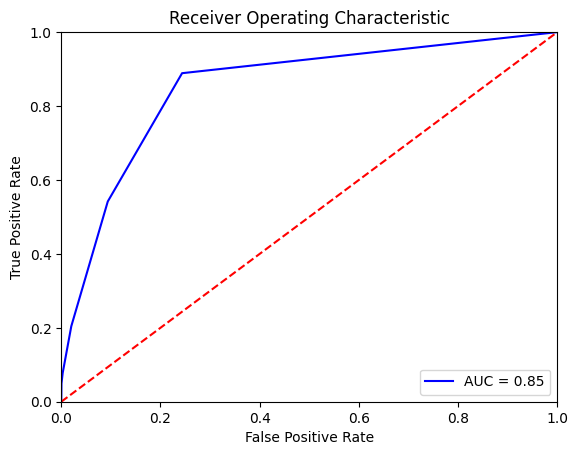

tdidf test : [0.977, 0.591, 0.94]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: DecisionTree
Accuracy score: 0.94
Train Score: 0.998
Test Score: 0.94
Time: 36.151
Confusion metric: 
[[17093  1116]
 [ 1062 17252]]


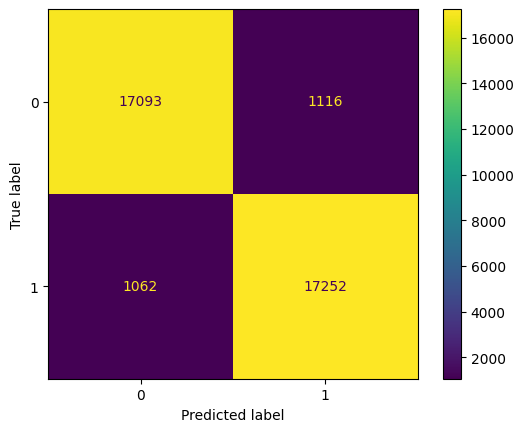

Precision Score of the classifier is: 0.939
Recall Score of the classifier is: 0.942
F1 Score of the classifier is: 0.941
AUC for our classifier is: 0.943


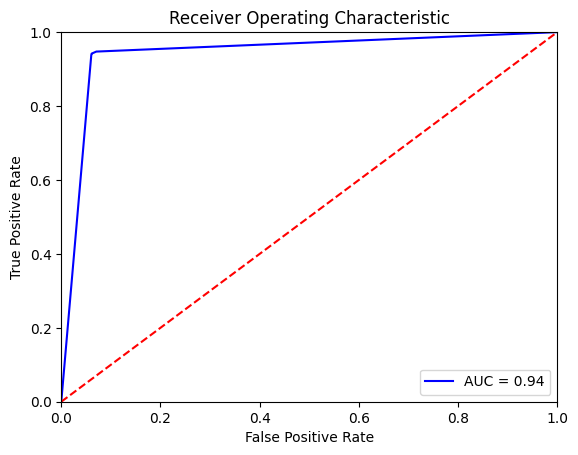

tdidf test : [0.977, 0.591, 0.94, 0.98]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: Bayes
Accuracy score: 0.98
Train Score: 0.985
Test Score: 0.98
Time: 0.057
Confusion metric: 
[[17753   456]
 [  264 18050]]


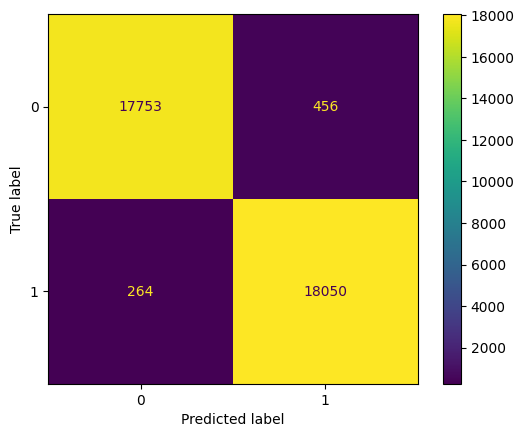

Precision Score of the classifier is: 0.975
Recall Score of the classifier is: 0.986
F1 Score of the classifier is: 0.98
AUC for our classifier is: 0.998


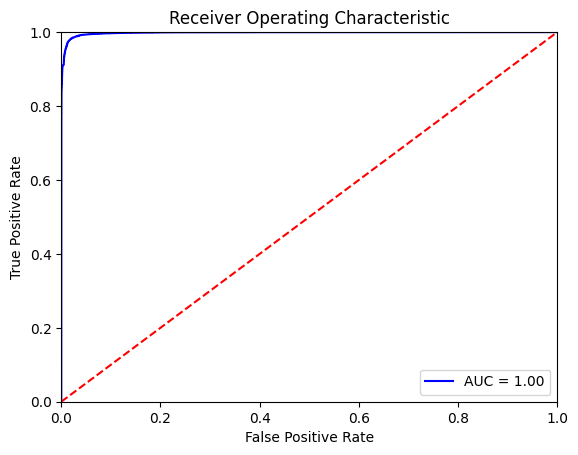

tdidf test : [0.977, 0.591, 0.94, 0.98, 0.959]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: Bagging
Accuracy score: 0.959
Train Score: 0.996
Test Score: 0.959
Time: 228.934
Confusion metric: 
[[17571   638]
 [  855 17459]]


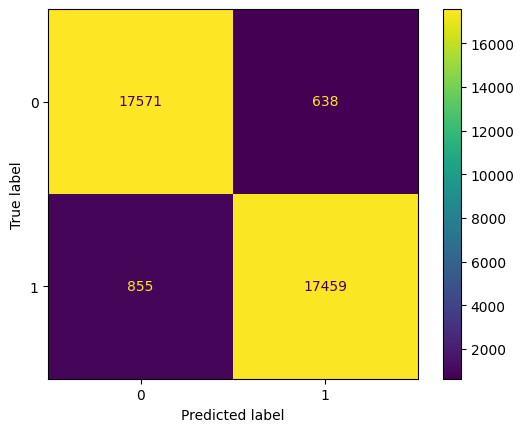

Precision Score of the classifier is: 0.965
Recall Score of the classifier is: 0.953
F1 Score of the classifier is: 0.959
AUC for our classifier is: 0.99


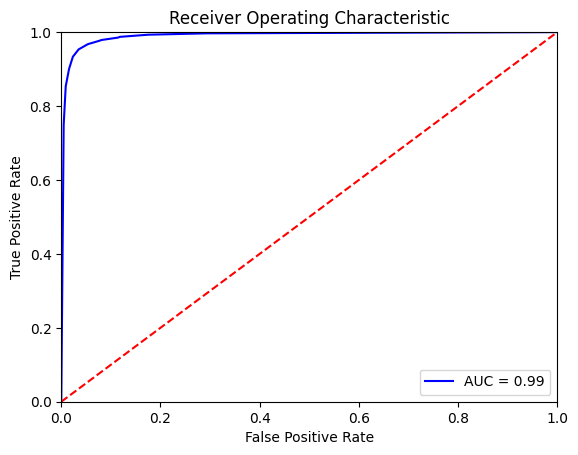

tdidf test : [0.977, 0.591, 0.94, 0.98, 0.959, 0.985]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: RandomForest
Accuracy score: 0.985
Train Score: 0.998
Test Score: 0.985
Time: 184.866
Confusion metric: 
[[18023   186]
 [  347 17967]]


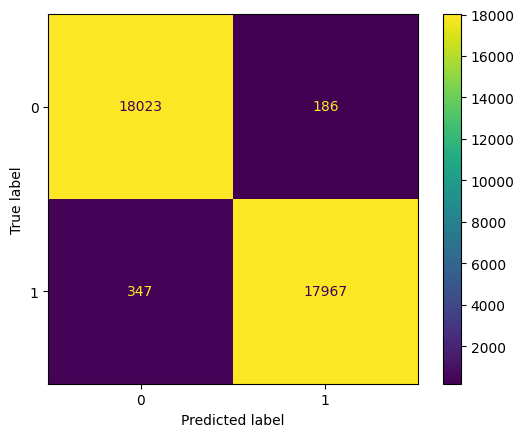

Precision Score of the classifier is: 0.99
Recall Score of the classifier is: 0.981
F1 Score of the classifier is: 0.985
AUC for our classifier is: 0.998


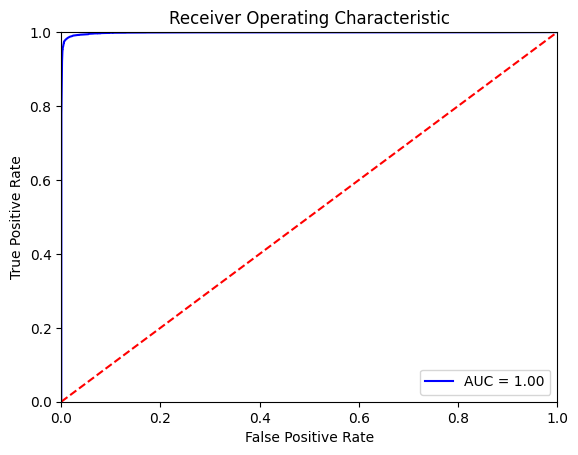

tdidf test : [0.977, 0.591, 0.94, 0.98, 0.959, 0.985, 0.963]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: XGB
Accuracy score: 0.963
Train Score: 0.977
Test Score: 0.963
Time: 6.978
Confusion metric: 
[[17558   651]
 [  692 17622]]


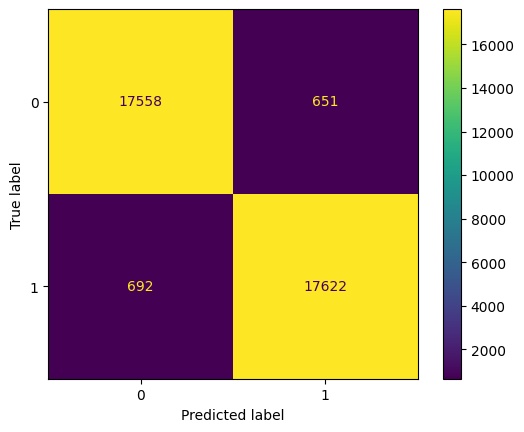

Precision Score of the classifier is: 0.964
Recall Score of the classifier is: 0.962
F1 Score of the classifier is: 0.963
AUC for our classifier is: 0.994


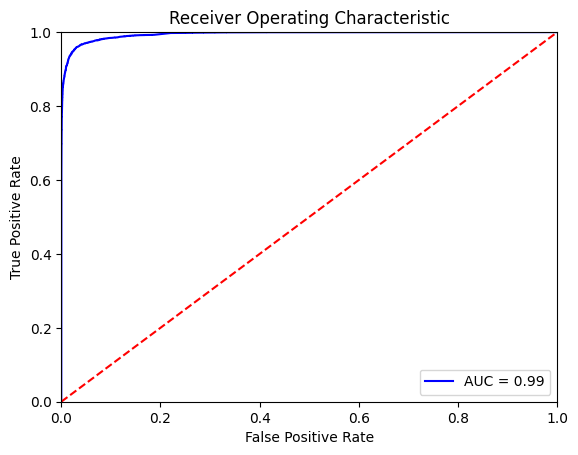

tdidf test : [0.977, 0.591, 0.94, 0.98, 0.959, 0.985, 0.963, 0.9]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Using Vectorizer :  Tfidf
Name of the model: AdaBoost
Accuracy score: 0.9
Train Score: 0.903
Test Score: 0.9
Time: 14.879
Confusion metric: 
[[16270  1939]
 [ 1726 16588]]


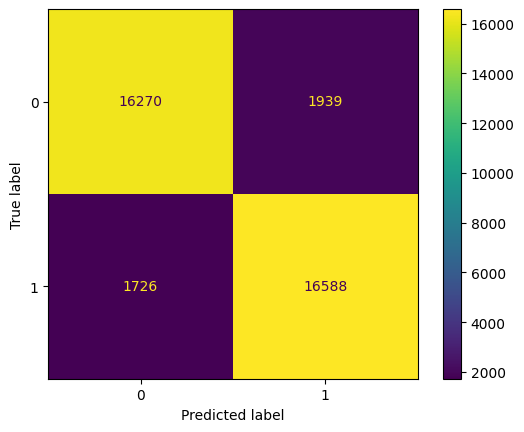

Precision Score of the classifier is: 0.895
Recall Score of the classifier is: 0.906
F1 Score of the classifier is: 0.901
AUC for our classifier is: 0.967


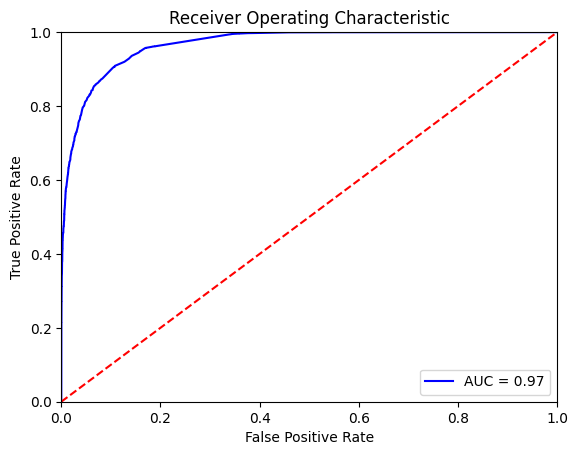

CountVectorizer : [0.982, 0.914, 0.934, 0.969, 0.95, 0.986, 0.953, 0.889]
TFIDF : [0.977, 0.591, 0.94, 0.98, 0.959, 0.985, 0.963, 0.9]
Total Time by all models: 21.118 minutes


In [213]:

vectorizer = ['CountVec', 'Tfidf']
start_time_o=time.time()
results_tfidf, results_cnt,names = list(), list(), list()
for i in vectorizer:
    if i == 'CountVec':
        X_train_transformed,preprocessing_pipeline = get_transformed_countv(X_train)
        
    else:
        X_train_transformed,preprocessing_pipeline = get_transformed_tfidf(X_train)

    X_test_transformed=preprocessing_pipeline.transform(X_test)
    
    models = get_models()
    
    for name, model in models.items():
        start_time=time.time()
        model.fit(X_train_transformed,y_train)
        names.append(name)
        y_pred_class = model.predict(X_test_transformed)
        result = metrics.accuracy_score(y_test, y_pred_class)
        if i == 'CountVec':
            results_cnt.append(round(result,3))
            print("cnt test :",results_cnt)
        else:
            results_tfidf.append(round(result,3))
            print("tdidf test :",results_tfidf)
        print("--"*50)
        print("--"*50)
        print("Using Vectorizer : ", i)
        print(f'Name of the model: {name}')
        print(f'Accuracy score: {round(result,3)}')
        print(f'Train Score: {round(model.score(X_train_transformed, y_train),3)}')
        print(f'Test Score: {round(model.score(X_test_transformed, y_test),3)}')
        print(f'Time: {round((time.time()-start_time),3)}')
        print("Confusion metric: ")
        print(confusion_matrix(y_test, y_pred_class))
        plot_confusion_matrix(model, X_test_transformed, y_test)
        plt.show()
        print(f"Precision Score of the classifier is: {round(precision_score(y_test, y_pred_class),3)}")
        print(f"Recall Score of the classifier is: {round(recall_score(y_test, y_pred_class),3)}")
        print(f"F1 Score of the classifier is: {round(f1_score(y_test, y_pred_class),3)}")
        make_rocauc(model,X_test_transformed,y_test)

print("CountVectorizer :", results_cnt)
print("TFIDF :", results_tfidf)

model_time = round((time.time()-start_time_o)/60, 3)
print(f'Total Time by all models: {model_time} minutes')


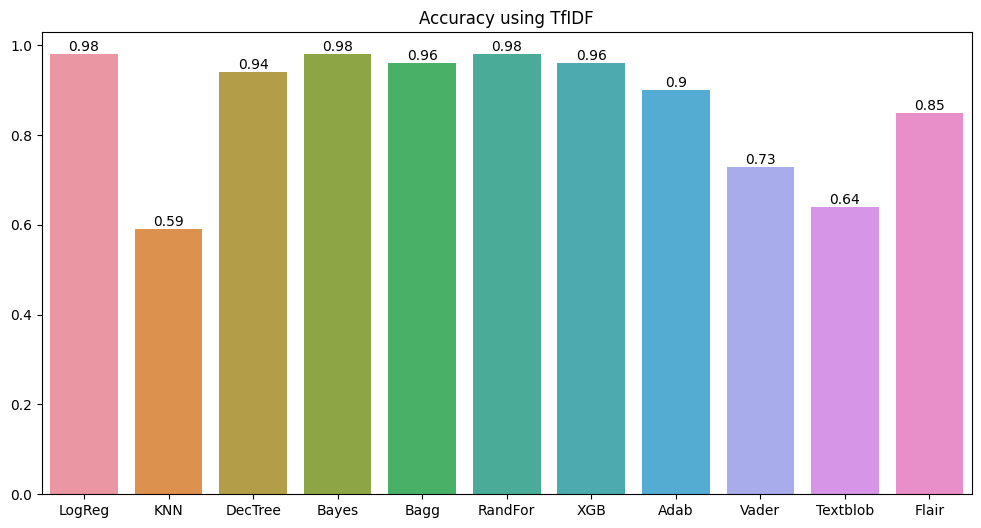

In [214]:
# plot model performance for comparison
plt.figure(figsize=(12,6))
model_names = ['LogReg','KNN','DecTree','Bayes','Bagg','RandFor','XGB','Adab','Vader','Textblob','Flair']
results_tfidf.append(accur_vader)
results_tfidf.append(accur_textblob)
results_tfidf.append(accur_flair)
new_list = [round(item, 2) for item in results_tfidf]
ax = sn.barplot(x=model_names, y=new_list)
ax.bar_label(ax.containers[0])
plt.title("Accuracy using TfIDF")
plt.show()

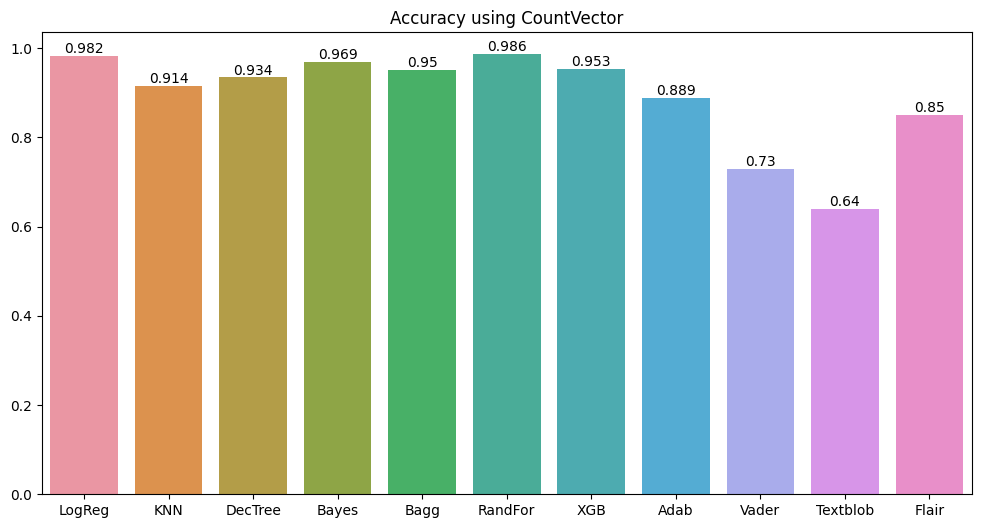

In [215]:
# plot model performance for comparison
plt.figure(figsize=(12,6))
model_names_cnt = ['LogReg','KNN','DecTree','Bayes','Bagg','RandFor','XGB','Adab','Vader','Textblob','Flair']
results_cnt.append(accur_vader)
results_cnt.append(accur_textblob)
results_cnt.append(accur_flair)
new_list_cnt = [round(item, 3) for item in results_cnt]
ax = sn.barplot(x=model_names_cnt, y=new_list_cnt)
ax.bar_label(ax.containers[0])
plt.title("Accuracy using CountVector")
plt.show()

## Performance of Random Forest > Logistic Regression > Naive Bayes 


## Pickle file for randomforest

In [218]:
import pickle

In [389]:
def build_model_in_pickle():
    cnt_vec = CountVectorizer(ngram_range=(1, 2))
    X_train_transformed=cnt_vec.fit_transform(X_train)
    X_test_transformed=cnt_vec.transform(X_test)
    model_rndf = RandomForestClassifier(n_estimators = 100)
    #Fitting model with training data
    model_rndf.fit(X_train_transformed, y_train)
    y_pred = model_rndf.predict(X_test_transformed)

    print('Score: ', model_rndf.score(X_test_transformed, y_test))
    words = cnt_vec.vocabulary_
    words_for_json = {}
    for k, v in words.items():
        #print(k,v)
        words_for_json[k] = int(v)
    pickle.dump(model_rndf, open('model_rndf.pkl','wb'))
    with open('word_feature_space.json', 'w') as fp:
        json.dump(words_for_json, fp)
     

In [299]:
build_model_in_pickle()

Score:  0.9857076362839854


In [390]:
def predict_review(review):
    words = {}
    model = pickle.load(open('model_rndf.pkl','rb'))
    with open('word_feature_space.json', 'r') as fp:
        words = json.load(fp)
    #print(words)
    length = len(words_for_json)
    incoming = [0] * length
    clean_sample = clean_comment(review[0])
    clean_words = re.sub("[^\w]", " ", clean_sample).split()
        
    for i in clean_words:
        if i in words_for_json:
            index = words_for_json[i]
            incoming[index] += 1
            
    outcome = model.predict([incoming])
    if int(outcome[0]) == 1:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
        
    result = sentiment

    return result

In [320]:
from flair.models import TextClassifier
from flair.data import Sentence
flair_classifier = TextClassifier.load('en-sentiment')

2022-11-28 09:12:10,218 loading file C:\Users\bhati\.flair\models\sentiment-en-mix-distillbert_4.pt


In [391]:
def get_flair_sentiment(input_review):
    
    if input_review == "":
        return 0
    
    sentence = Sentence(input_review[0])
    flair_classifier.predict(sentence)
    total_sentiment = sentence.labels[0]
    value = total_sentiment.value
    confidence = round(total_sentiment.score,2)
    return value,confidence
    
    

In [397]:
print("Enter your Review :\n ")

input_review_pos = [input()]

Enter your Review :
 
Hotel had an excellent location with pool view and tasty breakfast. Beds were clean.


In [398]:
input_review_neg = [input()]

Room was full of bugs. Tasteless breakfast. Service was lacking hospitality.


In [399]:
your_sentiment = predict_review(input_review_pos)
value,confidence = get_flair_sentiment(input_review_pos)
print(" Your Review is : \n", input_review_pos[0])
print(" Your sentiment using RandomForest is : ", your_sentiment)
print('Sentiment using flair is: ', value, " with confidence : " ,confidence)

 Your Review is : 
 Hotel had an excellent location with pool view and tasty breakfast. Beds were clean.
 Your sentiment using RandomForest is :  Positive
Sentiment using flair is:  POSITIVE  with confidence :  0.99


In [400]:
your_sentiment = predict_review(input_review_neg)
value,confidence = get_flair_sentiment(input_review_neg)
print(" Your Review is : \n", input_review_neg[0])
print(" Your sentiment using RandomForest is : ", your_sentiment)
print('Sentiment using flair is: ', value, " with confidence : " ,confidence)

 Your Review is : 
 Room was full of bugs. Tasteless breakfast. Service was lacking hospitality.
 Your sentiment using RandomForest is :  Negative
Sentiment using flair is:  NEGATIVE  with confidence :  1.0
